### Training the ST RES NET with MITBIH / Fantasia datasets

Sampling frequency in Fantasia is 250 Hz, whereas in the MITBIH it is 360 Hz. Therefore when testing the ST_RES_NET on Fantasia dataset, the window_in_seconds parameter is set to 14.4 which is an equivalent to 10 s window in 360 Hz.

In [2]:
import numpy as np
import torch
from customLib.vis import plot_ecg
from customLib.dataset import read_dataset
from customLib.config import fantasia_path, mitbih_path
from models.models import ST_RES_NET
from customLib.print_model_parameters import print_model_parameters
from customLib.metrics import print_metrics
import pickle

In [3]:
x_train, y_train, x_test, y_test, x_val, y_val = read_dataset(mitbih_path + "\\dataset\\downsampled", is_validation_set=True)

x_train = np.expand_dims(x_train, 1)
y_train = np.expand_dims(y_train, 1)

x_test = np.expand_dims(x_test, 1)
y_test = np.expand_dims(y_test, 1)

x_val = np.expand_dims(x_val, 1)
y_val = np.expand_dims(y_val, 1)

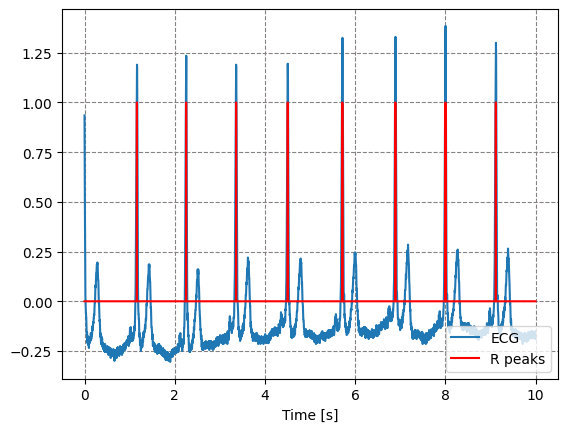

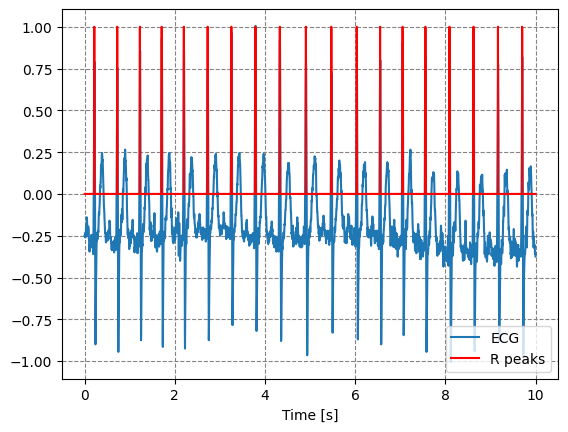

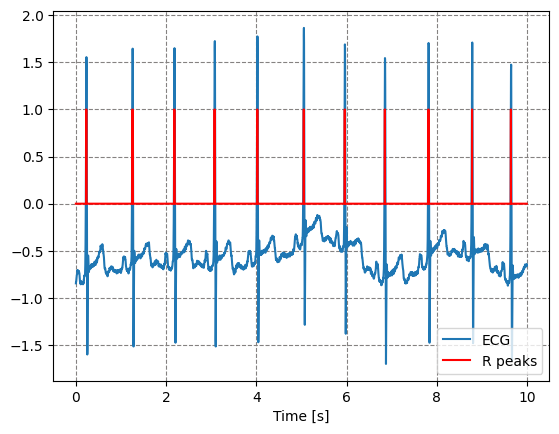

In [3]:
plot_ecg(x_train[100].flatten(), y_train[100].flatten(), 360)
plot_ecg(x_test[-1].flatten(), y_test[-1].flatten(), 360)
plot_ecg(x_val[-1].flatten(), y_val[-1].flatten(), 360)

In [4]:
# raw_ecgs with lr=1e-3
model = ST_RES_NET(learning_rate=1e-3, loss_pos_weight=17, loss_neg_weight=1, checkpoint_path="./checkpoints/st_res_net/raw_ecgs")

Training will be performed with: cuda:0


In [5]:
print_model_parameters(model)

Layer st_block_1: 10432 parameters
Layer st_block_1.bi_lstm: 8960 parameters
Layer st_block_1.conv_1: 520 parameters
Layer st_block_1.input_conv_3: 32 parameters
Layer st_block_1.input_conv_7: 64 parameters
Layer st_block_1.conv_kernel_3: 400 parameters
Layer st_block_1.conv_kernel_3.0: 200 parameters
Layer st_block_1.conv_kernel_3.1: 200 parameters
Layer st_block_1.conv_kernel_7: 456 parameters
Layer st_block_1.conv_kernel_7.0: 456 parameters
Layer st_block_2: 16480 parameters
Layer st_block_2.bi_lstm: 10752 parameters
Layer st_block_2.conv_1: 1040 parameters
Layer st_block_2.input_conv_3: 400 parameters
Layer st_block_2.input_conv_7: 912 parameters
Layer st_block_2.conv_kernel_3: 1568 parameters
Layer st_block_2.conv_kernel_3.0: 784 parameters
Layer st_block_2.conv_kernel_3.1: 784 parameters
Layer st_block_2.conv_kernel_7: 1808 parameters
Layer st_block_2.conv_kernel_7.0: 1808 parameters
Layer st_block_3: 33472 parameters
Layer st_block_3.bi_lstm: 12800 parameters
Layer st_block_3.co

====Epoch [1/50]====


  0%|          | 0/238 [00:00<?, ?it/s]

100%|█████████▉| 237/238 [01:21<00:00,  2.90it/s]

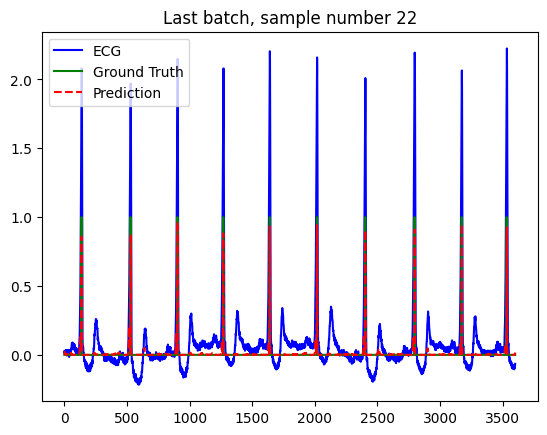

100%|██████████| 238/238 [01:22<00:00,  2.88it/s]



Train Loss: 0.1718
train Weighted Accuracy: 0.66686
train F1 Score: 0.47351
train TPR: 0.33400
train FPR: 0.00027
train TNR: 0.99973
train FNR: 0.66600



100%|██████████| 40/40 [00:05<00:00,  7.61it/s]



Validation Loss: 0.0804
validation Weighted Accuracy: 0.86820
validation F1 Score: 0.78064
validation TPR: 0.73692
validation FPR: 0.00053
validation TNR: 0.99947
validation FNR: 0.26308

====Epoch [2/50]====


100%|█████████▉| 237/238 [01:25<00:00,  2.90it/s]

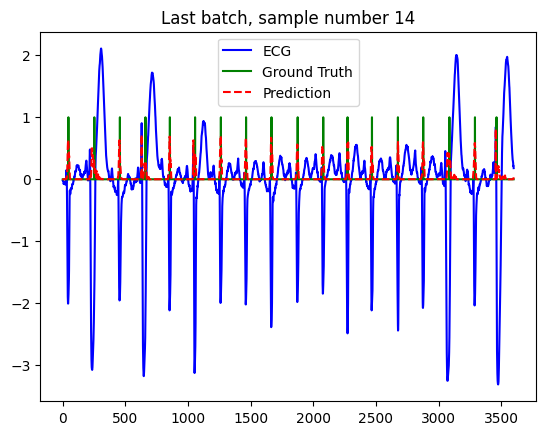

100%|██████████| 238/238 [01:27<00:00,  2.73it/s]



Train Loss: 0.0710
train Weighted Accuracy: 0.94457
train F1 Score: 0.86396
train TPR: 0.88974
train FPR: 0.00060
train TNR: 0.99940
train FNR: 0.11026



100%|██████████| 40/40 [00:05<00:00,  7.73it/s]



Validation Loss: 0.0637
validation Weighted Accuracy: 0.95514
validation F1 Score: 0.89307
validation TPR: 0.91072
validation FPR: 0.00045
validation TNR: 0.99955
validation FNR: 0.08928

====Epoch [3/50]====


100%|█████████▉| 237/238 [01:23<00:00,  2.92it/s]

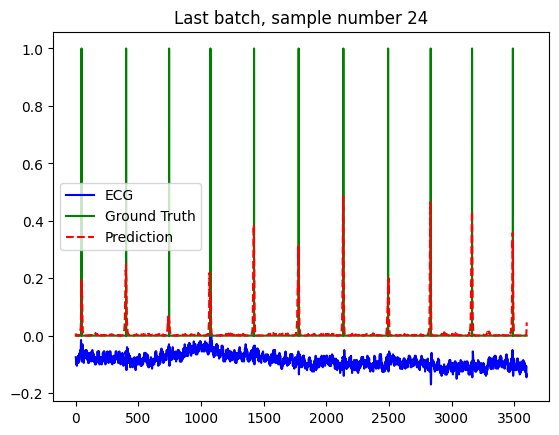

100%|██████████| 238/238 [01:24<00:00,  2.83it/s]



Train Loss: 0.0624
train Weighted Accuracy: 0.96702
train F1 Score: 0.88105
train TPR: 0.93470
train FPR: 0.00066
train TNR: 0.99934
train FNR: 0.06530



100%|██████████| 40/40 [00:03<00:00, 10.13it/s]



Validation Loss: 0.0569
validation Weighted Accuracy: 0.96591
validation F1 Score: 0.89427
validation TPR: 0.93236
validation FPR: 0.00054
validation TNR: 0.99946
validation FNR: 0.06764

====Epoch [4/50]====


100%|█████████▉| 237/238 [01:25<00:00,  2.87it/s]

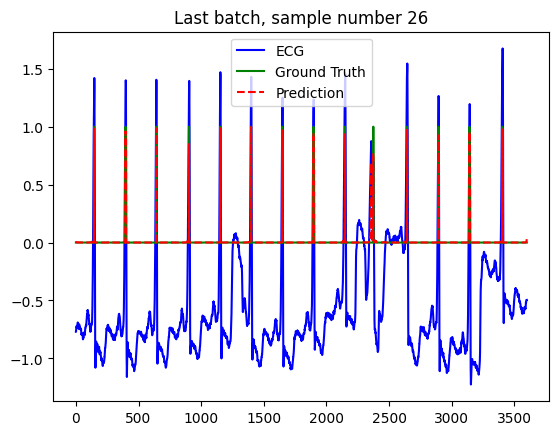

100%|██████████| 238/238 [01:26<00:00,  2.75it/s]



Train Loss: 0.0560
train Weighted Accuracy: 0.97238
train F1 Score: 0.86994
train TPR: 0.94557
train FPR: 0.00081
train TNR: 0.99919
train FNR: 0.05443



100%|██████████| 40/40 [00:05<00:00,  7.39it/s]



Validation Loss: 0.0499
validation Weighted Accuracy: 0.97462
validation F1 Score: 0.86255
validation TPR: 0.95013
validation FPR: 0.00089
validation TNR: 0.99911
validation FNR: 0.04987

====Epoch [5/50]====


100%|█████████▉| 237/238 [01:23<00:00,  2.90it/s]

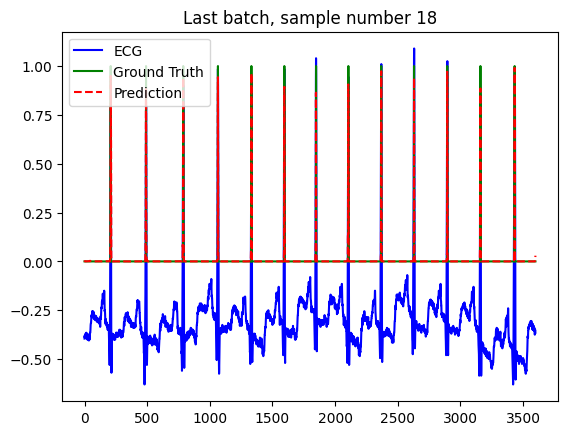

100%|██████████| 238/238 [01:24<00:00,  2.81it/s]



Train Loss: 0.0505
train Weighted Accuracy: 0.97465
train F1 Score: 0.87299
train TPR: 0.95011
train FPR: 0.00080
train TNR: 0.99920
train FNR: 0.04989



100%|██████████| 40/40 [00:05<00:00,  7.54it/s]



Validation Loss: 0.0458
validation Weighted Accuracy: 0.97430
validation F1 Score: 0.88927
validation TPR: 0.94925
validation FPR: 0.00065
validation TNR: 0.99935
validation FNR: 0.05075

====Epoch [6/50]====


100%|█████████▉| 237/238 [01:23<00:00,  2.91it/s]

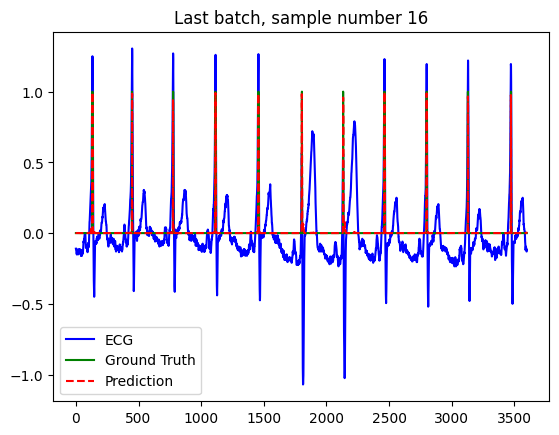

100%|██████████| 238/238 [01:24<00:00,  2.82it/s]



Train Loss: 0.0458
train Weighted Accuracy: 0.97737
train F1 Score: 0.88848
train TPR: 0.95542
train FPR: 0.00069
train TNR: 0.99931
train FNR: 0.04458



100%|██████████| 40/40 [00:05<00:00,  7.45it/s]



Validation Loss: 0.0407
validation Weighted Accuracy: 0.98070
validation F1 Score: 0.90399
validation TPR: 0.96199
validation FPR: 0.00059
validation TNR: 0.99941
validation FNR: 0.03801

====Epoch [7/50]====


100%|█████████▉| 237/238 [01:25<00:00,  2.87it/s]

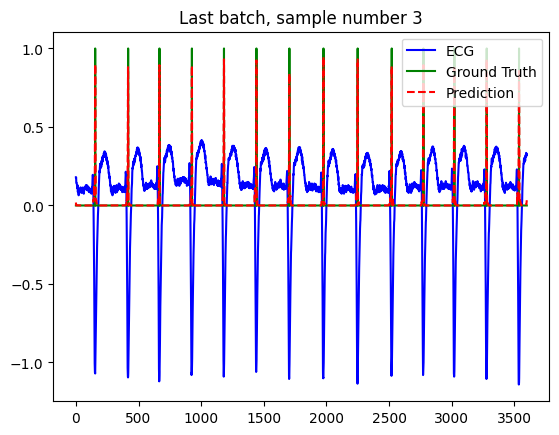

100%|██████████| 238/238 [01:26<00:00,  2.75it/s]



Train Loss: 0.0417
train Weighted Accuracy: 0.98028
train F1 Score: 0.90733
train TPR: 0.96111
train FPR: 0.00056
train TNR: 0.99944
train FNR: 0.03889



100%|██████████| 40/40 [00:05<00:00,  7.67it/s]



Validation Loss: 0.0362
validation Weighted Accuracy: 0.98479
validation F1 Score: 0.92718
validation TPR: 0.97002
validation FPR: 0.00043
validation TNR: 0.99957
validation FNR: 0.02998

====Epoch [8/50]====


100%|█████████▉| 237/238 [01:26<00:00,  2.81it/s]

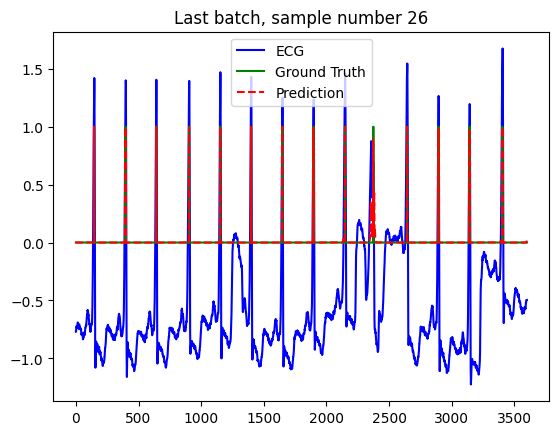

100%|██████████| 238/238 [01:29<00:00,  2.66it/s]



Train Loss: 0.0385
train Weighted Accuracy: 0.98244
train F1 Score: 0.91971
train TPR: 0.96536
train FPR: 0.00047
train TNR: 0.99953
train FNR: 0.03464



100%|██████████| 40/40 [00:05<00:00,  7.41it/s]



Validation Loss: 0.0350
validation Weighted Accuracy: 0.98471
validation F1 Score: 0.93664
validation TPR: 0.96978
validation FPR: 0.00036
validation TNR: 0.99964
validation FNR: 0.03022

====Epoch [9/50]====


100%|█████████▉| 237/238 [01:24<00:00,  2.83it/s]

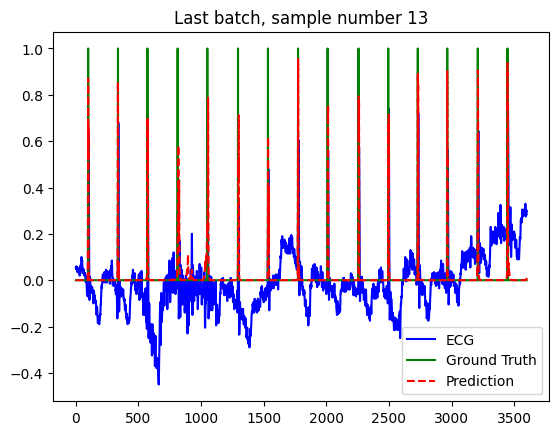

100%|██████████| 238/238 [01:25<00:00,  2.79it/s]



Train Loss: 0.0365
train Weighted Accuracy: 0.98420
train F1 Score: 0.92685
train TPR: 0.96884
train FPR: 0.00043
train TNR: 0.99957
train FNR: 0.03116



100%|██████████| 40/40 [00:05<00:00,  7.59it/s]



Validation Loss: 0.0321
validation Weighted Accuracy: 0.98733
validation F1 Score: 0.93965
validation TPR: 0.97501
validation FPR: 0.00035
validation TNR: 0.99965
validation FNR: 0.02499

====Epoch [10/50]====


100%|█████████▉| 237/238 [01:25<00:00,  2.89it/s]

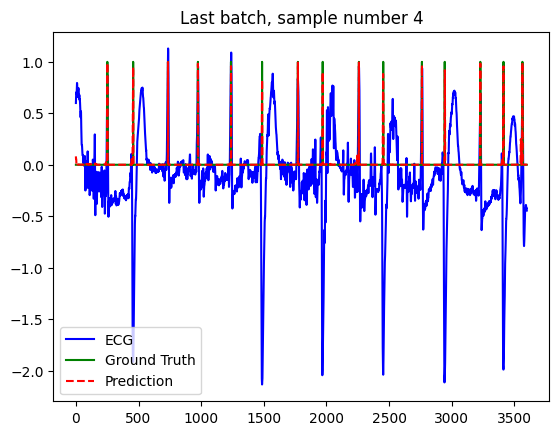

100%|██████████| 238/238 [01:26<00:00,  2.76it/s]



Train Loss: 0.0345
train Weighted Accuracy: 0.98572
train F1 Score: 0.93394
train TPR: 0.97183
train FPR: 0.00039
train TNR: 0.99961
train FNR: 0.02817



100%|██████████| 40/40 [00:05<00:00,  7.68it/s]



Validation Loss: 0.0313
validation Weighted Accuracy: 0.98643
validation F1 Score: 0.94831
validation TPR: 0.97313
validation FPR: 0.00028
validation TNR: 0.99972
validation FNR: 0.02687

====Epoch [11/50]====


100%|█████████▉| 237/238 [01:21<00:00,  2.92it/s]

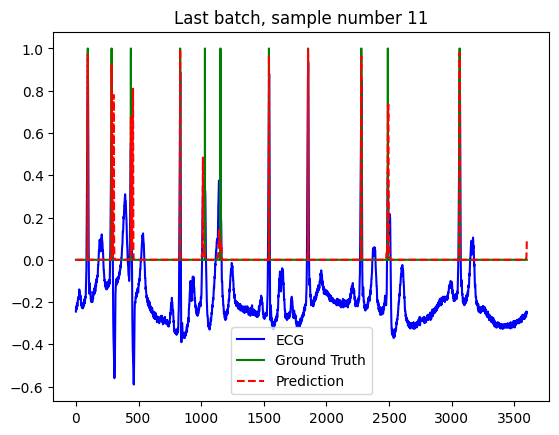

100%|██████████| 238/238 [01:22<00:00,  2.89it/s]



Train Loss: 0.0333
train Weighted Accuracy: 0.98693
train F1 Score: 0.93701
train TPR: 0.97424
train FPR: 0.00037
train TNR: 0.99963
train FNR: 0.02576



100%|██████████| 40/40 [00:05<00:00,  7.94it/s]



Validation Loss: 0.0300
validation Weighted Accuracy: 0.98855
validation F1 Score: 0.94733
validation TPR: 0.97740
validation FPR: 0.00030
validation TNR: 0.99970
validation FNR: 0.02260

====Epoch [12/50]====


100%|█████████▉| 237/238 [01:22<00:00,  2.90it/s]

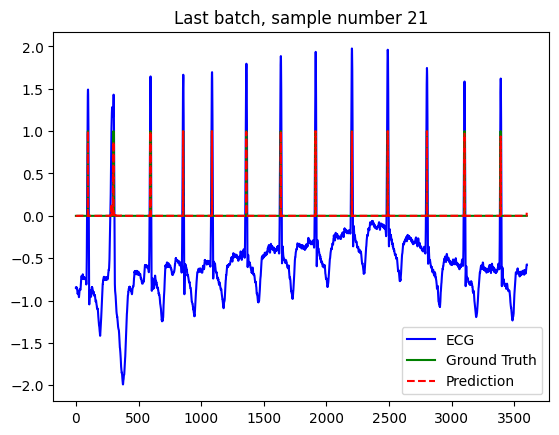

100%|██████████| 238/238 [01:23<00:00,  2.84it/s]



Train Loss: 0.0320
train Weighted Accuracy: 0.98772
train F1 Score: 0.93972
train TPR: 0.97579
train FPR: 0.00036
train TNR: 0.99964
train FNR: 0.02421



100%|██████████| 40/40 [00:05<00:00,  7.86it/s]



Validation Loss: 0.0300
validation Weighted Accuracy: 0.98876
validation F1 Score: 0.94569
validation TPR: 0.97784
validation FPR: 0.00032
validation TNR: 0.99968
validation FNR: 0.02216

====Epoch [13/50]====


100%|█████████▉| 237/238 [01:22<00:00,  2.92it/s]

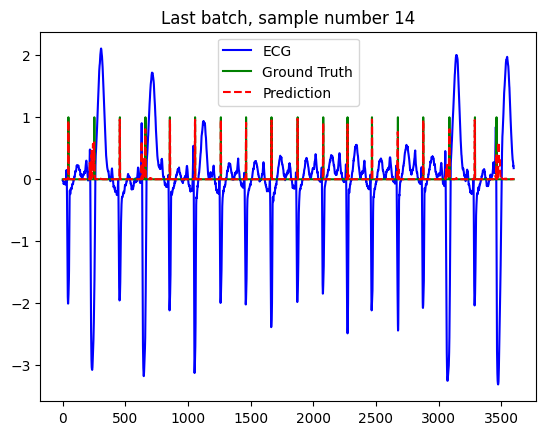

100%|██████████| 238/238 [01:23<00:00,  2.84it/s]



Train Loss: 0.0310
train Weighted Accuracy: 0.98887
train F1 Score: 0.94354
train TPR: 0.97808
train FPR: 0.00034
train TNR: 0.99966
train FNR: 0.02192



100%|██████████| 40/40 [00:05<00:00,  7.23it/s]



Validation Loss: 0.0282
validation Weighted Accuracy: 0.98841
validation F1 Score: 0.95741
validation TPR: 0.97704
validation FPR: 0.00023
validation TNR: 0.99977
validation FNR: 0.02296

====Epoch [14/50]====


100%|█████████▉| 237/238 [01:23<00:00,  2.91it/s]

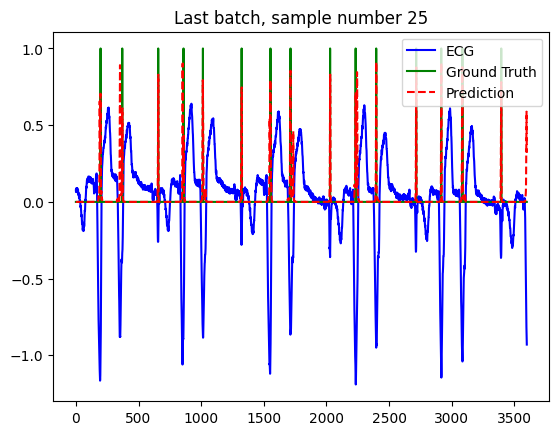

100%|██████████| 238/238 [01:24<00:00,  2.80it/s]



Train Loss: 0.0302
train Weighted Accuracy: 0.98926
train F1 Score: 0.94573
train TPR: 0.97883
train FPR: 0.00032
train TNR: 0.99968
train FNR: 0.02117



100%|██████████| 40/40 [00:05<00:00,  7.68it/s]



Validation Loss: 0.0275
validation Weighted Accuracy: 0.98854
validation F1 Score: 0.96030
validation TPR: 0.97728
validation FPR: 0.00020
validation TNR: 0.99980
validation FNR: 0.02272

====Epoch [15/50]====


100%|█████████▉| 237/238 [01:22<00:00,  2.91it/s]

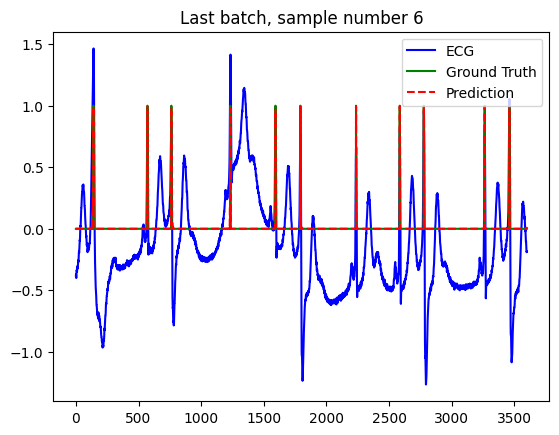

100%|██████████| 238/238 [01:23<00:00,  2.84it/s]



Train Loss: 0.0290
train Weighted Accuracy: 0.99023
train F1 Score: 0.94980
train TPR: 0.98077
train FPR: 0.00030
train TNR: 0.99970
train FNR: 0.01923



100%|██████████| 40/40 [00:05<00:00,  7.85it/s]



Validation Loss: 0.0273
validation Weighted Accuracy: 0.98858
validation F1 Score: 0.96128
validation TPR: 0.97736
validation FPR: 0.00020
validation TNR: 0.99980
validation FNR: 0.02264

====Epoch [16/50]====


100%|█████████▉| 237/238 [01:22<00:00,  2.89it/s]

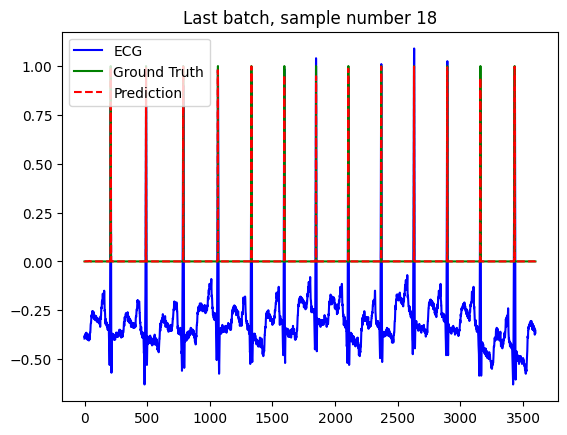

100%|██████████| 238/238 [01:23<00:00,  2.85it/s]



Train Loss: 0.0284
train Weighted Accuracy: 0.99047
train F1 Score: 0.95115
train TPR: 0.98123
train FPR: 0.00029
train TNR: 0.99971
train FNR: 0.01877



100%|██████████| 40/40 [00:05<00:00,  7.74it/s]



Validation Loss: 0.0258
validation Weighted Accuracy: 0.98864
validation F1 Score: 0.96183
validation TPR: 0.97748
validation FPR: 0.00019
validation TNR: 0.99981
validation FNR: 0.02252

====Epoch [17/50]====


100%|█████████▉| 237/238 [01:23<00:00,  2.92it/s]

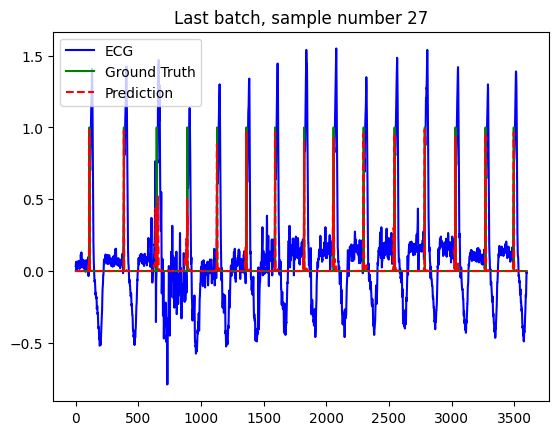

100%|██████████| 238/238 [01:24<00:00,  2.81it/s]



Train Loss: 0.0278
train Weighted Accuracy: 0.99072
train F1 Score: 0.95244
train TPR: 0.98172
train FPR: 0.00028
train TNR: 0.99972
train FNR: 0.01828



100%|██████████| 40/40 [00:05<00:00,  7.81it/s]



Validation Loss: 0.0256
validation Weighted Accuracy: 0.98917
validation F1 Score: 0.96316
validation TPR: 0.97852
validation FPR: 0.00019
validation TNR: 0.99981
validation FNR: 0.02148

====Epoch [18/50]====


100%|█████████▉| 237/238 [01:23<00:00,  2.88it/s]

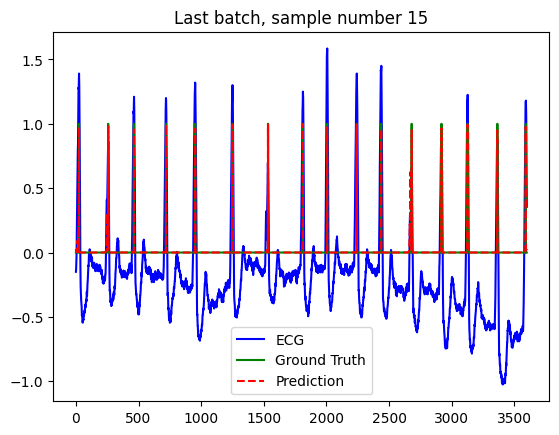

100%|██████████| 238/238 [01:24<00:00,  2.83it/s]



Train Loss: 0.0271
train Weighted Accuracy: 0.99104
train F1 Score: 0.95407
train TPR: 0.98236
train FPR: 0.00027
train TNR: 0.99973
train FNR: 0.01764



100%|██████████| 40/40 [00:05<00:00,  7.64it/s]



Validation Loss: 0.0249
validation Weighted Accuracy: 0.99062
validation F1 Score: 0.96377
validation TPR: 0.98143
validation FPR: 0.00019
validation TNR: 0.99981
validation FNR: 0.01857

====Epoch [19/50]====


100%|█████████▉| 237/238 [01:26<00:00,  2.75it/s]

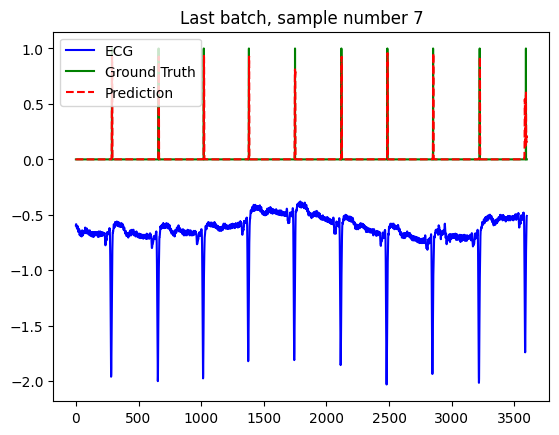

100%|██████████| 238/238 [01:28<00:00,  2.69it/s]



Train Loss: 0.0264
train Weighted Accuracy: 0.99149
train F1 Score: 0.95558
train TPR: 0.98325
train FPR: 0.00026
train TNR: 0.99974
train FNR: 0.01675



100%|██████████| 40/40 [00:05<00:00,  7.69it/s]



Validation Loss: 0.0243
validation Weighted Accuracy: 0.99070
validation F1 Score: 0.96446
validation TPR: 0.98159
validation FPR: 0.00019
validation TNR: 0.99981
validation FNR: 0.01841

====Epoch [20/50]====


100%|█████████▉| 237/238 [01:24<00:00,  2.91it/s]

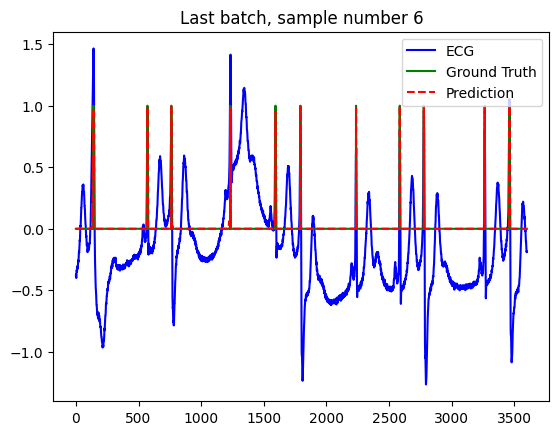

100%|██████████| 238/238 [01:25<00:00,  2.78it/s]



Train Loss: 0.0260
train Weighted Accuracy: 0.99170
train F1 Score: 0.95696
train TPR: 0.98366
train FPR: 0.00025
train TNR: 0.99975
train FNR: 0.01634



100%|██████████| 40/40 [00:05<00:00,  7.46it/s]



Validation Loss: 0.0247
validation Weighted Accuracy: 0.99038
validation F1 Score: 0.96453
validation TPR: 0.98096
validation FPR: 0.00019
validation TNR: 0.99981
validation FNR: 0.01904

====Epoch [21/50]====


100%|█████████▉| 237/238 [01:24<00:00,  2.89it/s]

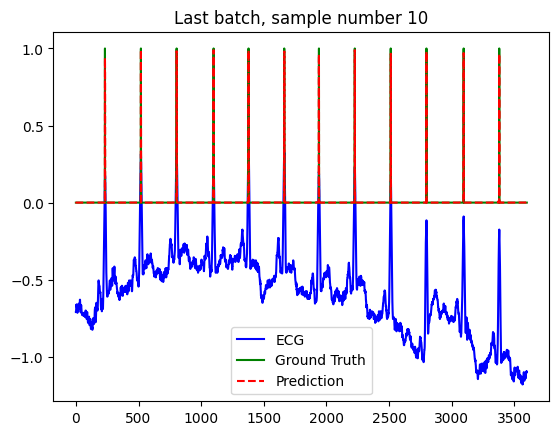

100%|██████████| 238/238 [01:25<00:00,  2.79it/s]



Train Loss: 0.0255
train Weighted Accuracy: 0.99211
train F1 Score: 0.95871
train TPR: 0.98447
train FPR: 0.00024
train TNR: 0.99976
train FNR: 0.01553



100%|██████████| 40/40 [00:05<00:00,  7.48it/s]



Validation Loss: 0.0238
validation Weighted Accuracy: 0.99055
validation F1 Score: 0.96583
validation TPR: 0.98127
validation FPR: 0.00018
validation TNR: 0.99982
validation FNR: 0.01873

====Epoch [22/50]====


100%|█████████▉| 237/238 [01:25<00:00,  2.68it/s]

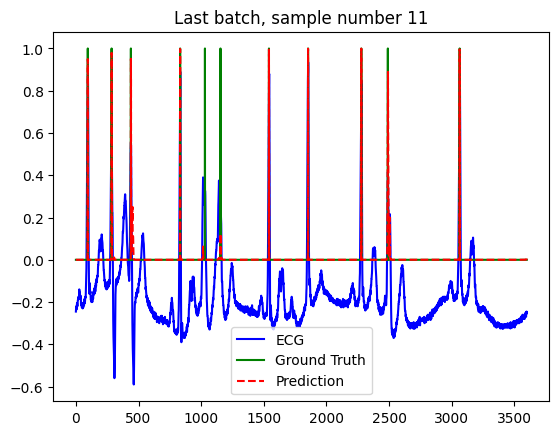

100%|██████████| 238/238 [01:26<00:00,  2.74it/s]



Train Loss: 0.0251
train Weighted Accuracy: 0.99215
train F1 Score: 0.95951
train TPR: 0.98455
train FPR: 0.00024
train TNR: 0.99976
train FNR: 0.01545



100%|██████████| 40/40 [00:05<00:00,  7.52it/s]



Validation Loss: 0.0243
validation Weighted Accuracy: 0.99098
validation F1 Score: 0.96554
validation TPR: 0.98215
validation FPR: 0.00018
validation TNR: 0.99982
validation FNR: 0.01785

====Epoch [23/50]====


100%|█████████▉| 237/238 [01:19<00:00,  4.27it/s]

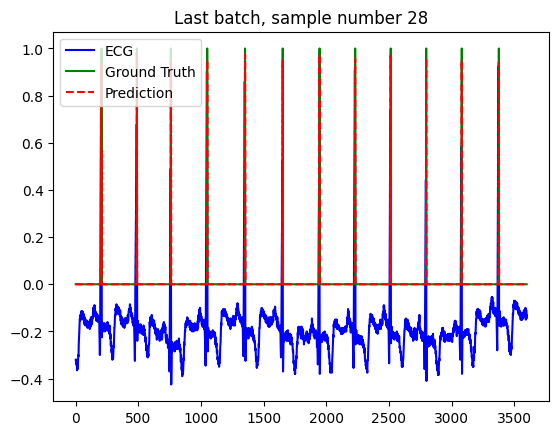

100%|██████████| 238/238 [01:21<00:00,  2.93it/s]



Train Loss: 0.0246
train Weighted Accuracy: 0.99247
train F1 Score: 0.96047
train TPR: 0.98518
train FPR: 0.00023
train TNR: 0.99977
train FNR: 0.01482



100%|██████████| 40/40 [00:04<00:00,  9.81it/s]



Validation Loss: 0.0232
validation Weighted Accuracy: 0.99146
validation F1 Score: 0.96491
validation TPR: 0.98311
validation FPR: 0.00019
validation TNR: 0.99981
validation FNR: 0.01689

====Epoch [24/50]====


100%|█████████▉| 237/238 [01:23<00:00,  2.67it/s]

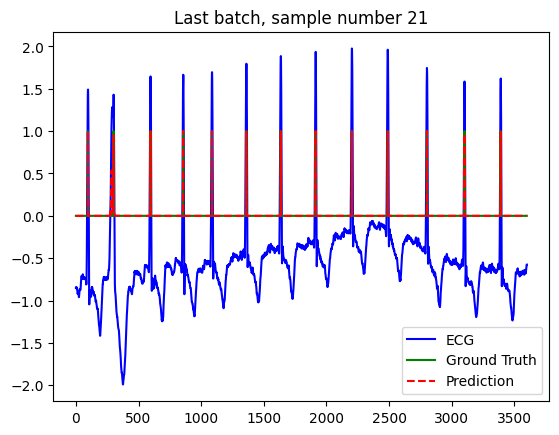

100%|██████████| 238/238 [01:25<00:00,  2.80it/s]



Train Loss: 0.0244
train Weighted Accuracy: 0.99267
train F1 Score: 0.96098
train TPR: 0.98556
train FPR: 0.00023
train TNR: 0.99977
train FNR: 0.01444



100%|██████████| 40/40 [00:05<00:00,  7.18it/s]



Validation Loss: 0.0235
validation Weighted Accuracy: 0.99125
validation F1 Score: 0.96882
validation TPR: 0.98267
validation FPR: 0.00016
validation TNR: 0.99984
validation FNR: 0.01733

====Epoch [25/50]====


100%|█████████▉| 237/238 [00:57<00:00,  4.22it/s]

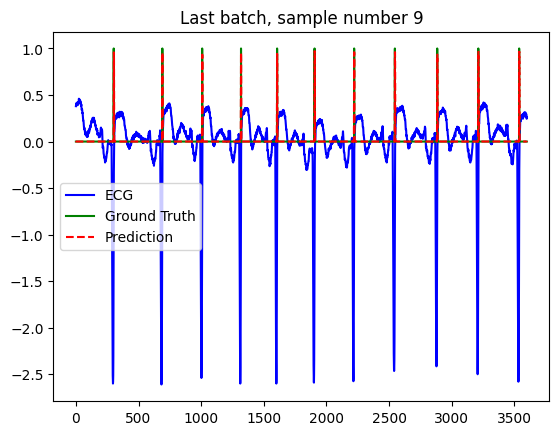

100%|██████████| 238/238 [00:58<00:00,  4.08it/s]



Train Loss: 0.0239
train Weighted Accuracy: 0.99291
train F1 Score: 0.96171
train TPR: 0.98606
train FPR: 0.00023
train TNR: 0.99977
train FNR: 0.01394



100%|██████████| 40/40 [00:05<00:00,  7.44it/s]



Validation Loss: 0.0236
validation Weighted Accuracy: 0.99083
validation F1 Score: 0.96589
validation TPR: 0.98183
validation FPR: 0.00018
validation TNR: 0.99982
validation FNR: 0.01817

====Epoch [26/50]====


100%|█████████▉| 237/238 [01:24<00:00,  2.87it/s]

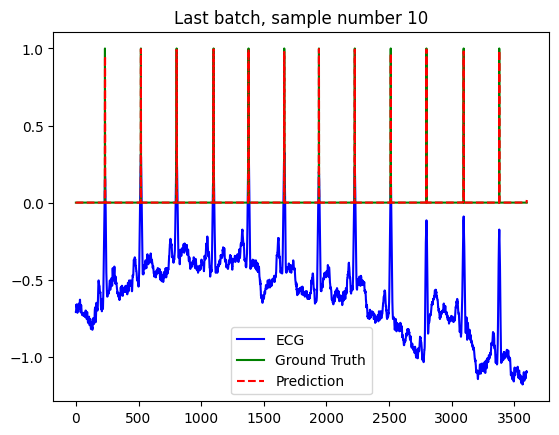

100%|██████████| 238/238 [01:25<00:00,  2.78it/s]



Train Loss: 0.0235
train Weighted Accuracy: 0.99301
train F1 Score: 0.96282
train TPR: 0.98624
train FPR: 0.00022
train TNR: 0.99978
train FNR: 0.01376



100%|██████████| 40/40 [00:05<00:00,  7.92it/s]



Validation Loss: 0.0228
validation Weighted Accuracy: 0.99137
validation F1 Score: 0.96877
validation TPR: 0.98291
validation FPR: 0.00016
validation TNR: 0.99984
validation FNR: 0.01709

====Epoch [27/50]====


100%|█████████▉| 237/238 [01:24<00:00,  2.87it/s]

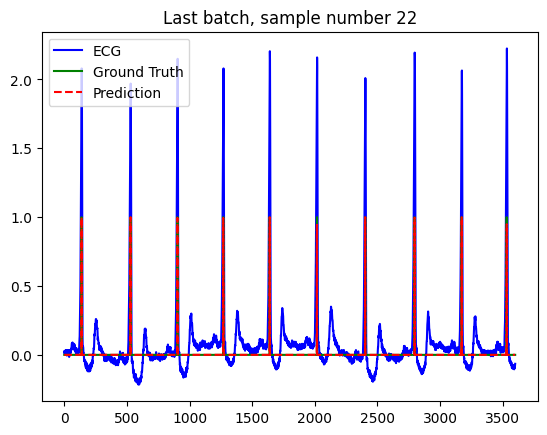

100%|██████████| 238/238 [01:25<00:00,  2.78it/s]



Train Loss: 0.0233
train Weighted Accuracy: 0.99321
train F1 Score: 0.96312
train TPR: 0.98665
train FPR: 0.00022
train TNR: 0.99978
train FNR: 0.01335



100%|██████████| 40/40 [00:05<00:00,  7.68it/s]



Validation Loss: 0.0227
validation Weighted Accuracy: 0.99122
validation F1 Score: 0.97108
validation TPR: 0.98259
validation FPR: 0.00015
validation TNR: 0.99985
validation FNR: 0.01741

====Epoch [28/50]====


100%|█████████▉| 237/238 [00:58<00:00,  2.90it/s]

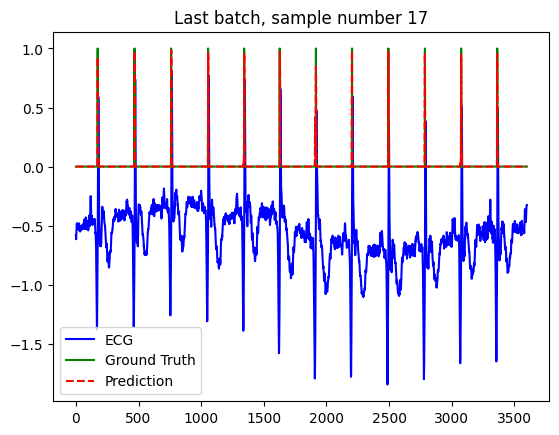

100%|██████████| 238/238 [01:00<00:00,  3.92it/s]



Train Loss: 0.0227
train Weighted Accuracy: 0.99348
train F1 Score: 0.96419
train TPR: 0.98717
train FPR: 0.00021
train TNR: 0.99979
train FNR: 0.01283



100%|██████████| 40/40 [00:05<00:00,  7.75it/s]



Validation Loss: 0.0224
validation Weighted Accuracy: 0.99227
validation F1 Score: 0.97016
validation TPR: 0.98471
validation FPR: 0.00016
validation TNR: 0.99984
validation FNR: 0.01529

====Epoch [29/50]====


100%|█████████▉| 237/238 [01:23<00:00,  2.87it/s]

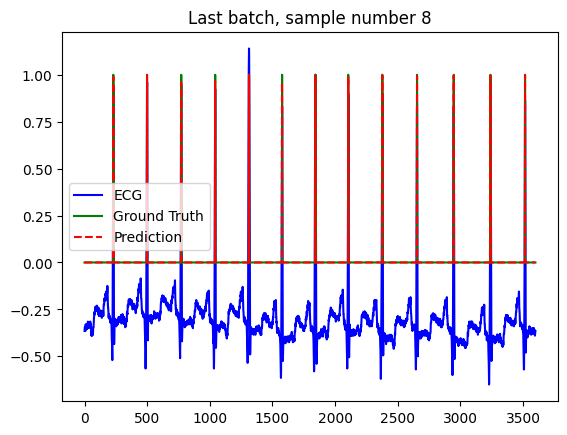

100%|██████████| 238/238 [01:24<00:00,  2.80it/s]



Train Loss: 0.0229
train Weighted Accuracy: 0.99325
train F1 Score: 0.96320
train TPR: 0.98672
train FPR: 0.00022
train TNR: 0.99978
train FNR: 0.01328



100%|██████████| 40/40 [00:03<00:00, 10.77it/s]



Validation Loss: 0.0221
validation Weighted Accuracy: 0.99199
validation F1 Score: 0.96896
validation TPR: 0.98415
validation FPR: 0.00017
validation TNR: 0.99983
validation FNR: 0.01585

====Epoch [30/50]====


100%|█████████▉| 237/238 [01:25<00:00,  2.84it/s]

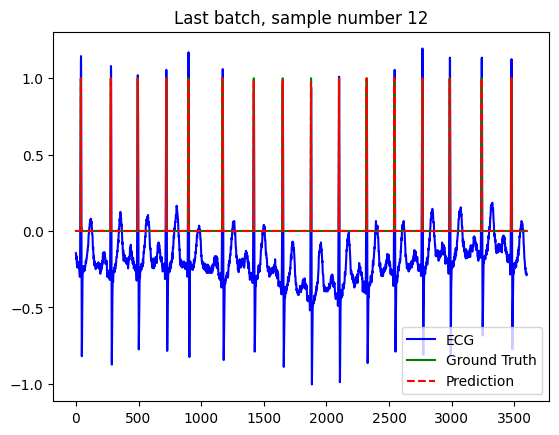

100%|██████████| 238/238 [01:26<00:00,  2.75it/s]



Train Loss: 0.0222
train Weighted Accuracy: 0.99372
train F1 Score: 0.96583
train TPR: 0.98765
train FPR: 0.00020
train TNR: 0.99980
train FNR: 0.01235



100%|██████████| 40/40 [00:05<00:00,  7.41it/s]



Validation Loss: 0.0218
validation Weighted Accuracy: 0.99233
validation F1 Score: 0.97019
validation TPR: 0.98483
validation FPR: 0.00016
validation TNR: 0.99984
validation FNR: 0.01517

====Epoch [31/50]====


100%|█████████▉| 237/238 [01:27<00:00,  2.74it/s]

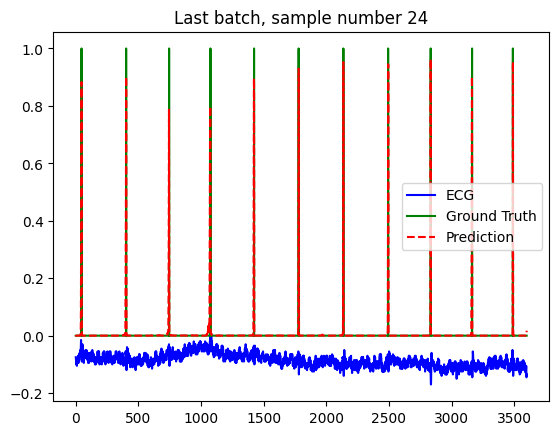

100%|██████████| 238/238 [01:29<00:00,  2.65it/s]



Train Loss: 0.0218
train Weighted Accuracy: 0.99393
train F1 Score: 0.96650
train TPR: 0.98806
train FPR: 0.00020
train TNR: 0.99980
train FNR: 0.01194



100%|██████████| 40/40 [00:05<00:00,  7.52it/s]



Validation Loss: 0.0217
validation Weighted Accuracy: 0.99162
validation F1 Score: 0.97028
validation TPR: 0.98339
validation FPR: 0.00015
validation TNR: 0.99985
validation FNR: 0.01661

====Epoch [32/50]====


100%|█████████▉| 237/238 [01:21<00:00,  2.82it/s]

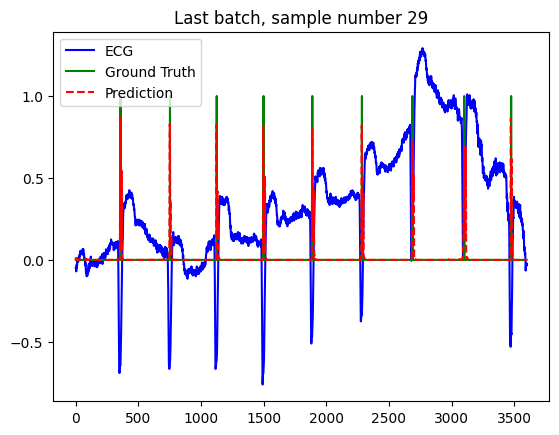

100%|██████████| 238/238 [01:23<00:00,  2.86it/s]



Train Loss: 0.0217
train Weighted Accuracy: 0.99389
train F1 Score: 0.96656
train TPR: 0.98798
train FPR: 0.00020
train TNR: 0.99980
train FNR: 0.01202



100%|██████████| 40/40 [00:05<00:00,  7.56it/s]



Validation Loss: 0.0218
validation Weighted Accuracy: 0.99210
validation F1 Score: 0.97084
validation TPR: 0.98435
validation FPR: 0.00015
validation TNR: 0.99985
validation FNR: 0.01565

====Epoch [33/50]====


100%|█████████▉| 237/238 [01:24<00:00,  2.87it/s]

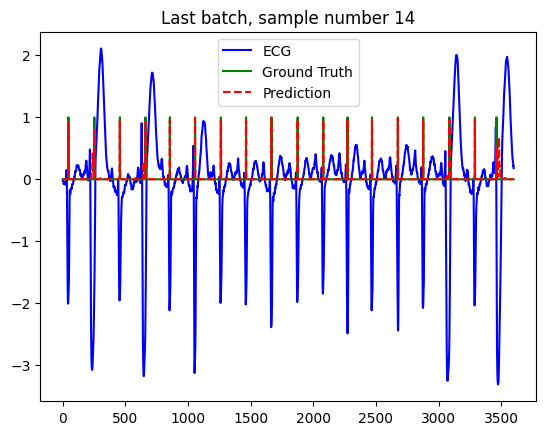

100%|██████████| 238/238 [01:25<00:00,  2.79it/s]



Train Loss: 0.0216
train Weighted Accuracy: 0.99408
train F1 Score: 0.96743
train TPR: 0.98835
train FPR: 0.00019
train TNR: 0.99981
train FNR: 0.01165



100%|██████████| 40/40 [00:05<00:00,  7.74it/s]



Validation Loss: 0.0214
validation Weighted Accuracy: 0.99307
validation F1 Score: 0.97057
validation TPR: 0.98631
validation FPR: 0.00016
validation TNR: 0.99984
validation FNR: 0.01369

====Epoch [34/50]====


100%|█████████▉| 237/238 [01:22<00:00,  2.91it/s]

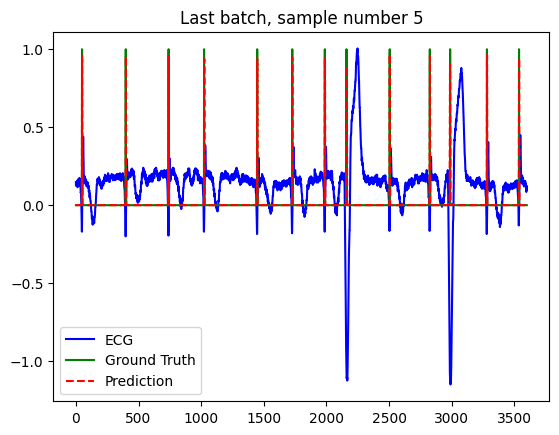

100%|██████████| 238/238 [01:24<00:00,  2.82it/s]



Train Loss: 0.0211
train Weighted Accuracy: 0.99429
train F1 Score: 0.96822
train TPR: 0.98877
train FPR: 0.00019
train TNR: 0.99981
train FNR: 0.01123



100%|██████████| 40/40 [00:05<00:00,  7.70it/s]



Validation Loss: 0.0210
validation Weighted Accuracy: 0.99296
validation F1 Score: 0.97305
validation TPR: 0.98607
validation FPR: 0.00014
validation TNR: 0.99986
validation FNR: 0.01393

====Epoch [35/50]====


100%|█████████▉| 237/238 [01:22<00:00,  2.92it/s]

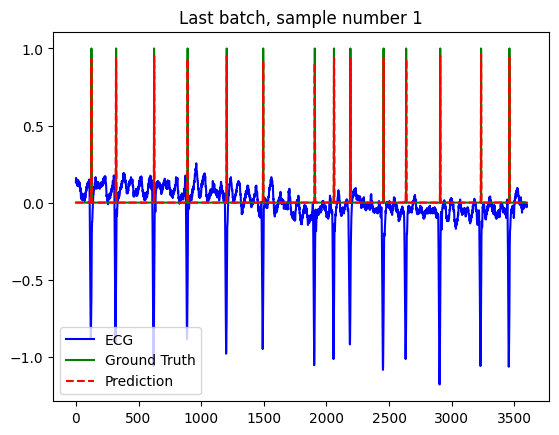

100%|██████████| 238/238 [01:23<00:00,  2.84it/s]



Train Loss: 0.0219
train Weighted Accuracy: 0.99394
train F1 Score: 0.96408
train TPR: 0.98810
train FPR: 0.00022
train TNR: 0.99978
train FNR: 0.01190



100%|██████████| 40/40 [00:05<00:00,  7.77it/s]



Validation Loss: 0.0218
validation Weighted Accuracy: 0.99216
validation F1 Score: 0.96590
validation TPR: 0.98451
validation FPR: 0.00019
validation TNR: 0.99981
validation FNR: 0.01549

====Epoch [36/50]====


100%|█████████▉| 237/238 [01:23<00:00,  2.86it/s]

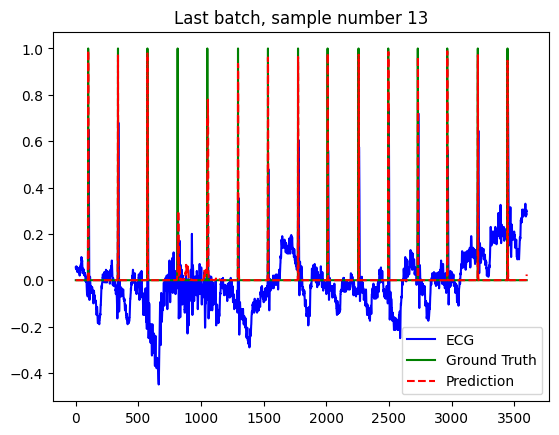

100%|██████████| 238/238 [01:24<00:00,  2.81it/s]



Train Loss: 0.0210
train Weighted Accuracy: 0.99447
train F1 Score: 0.96828
train TPR: 0.98912
train FPR: 0.00019
train TNR: 0.99981
train FNR: 0.01088



100%|██████████| 40/40 [00:05<00:00,  7.82it/s]



Validation Loss: 0.0209
validation Weighted Accuracy: 0.99233
validation F1 Score: 0.97344
validation TPR: 0.98479
validation FPR: 0.00014
validation TNR: 0.99986
validation FNR: 0.01521

====Epoch [37/50]====


100%|█████████▉| 237/238 [01:24<00:00,  2.88it/s]

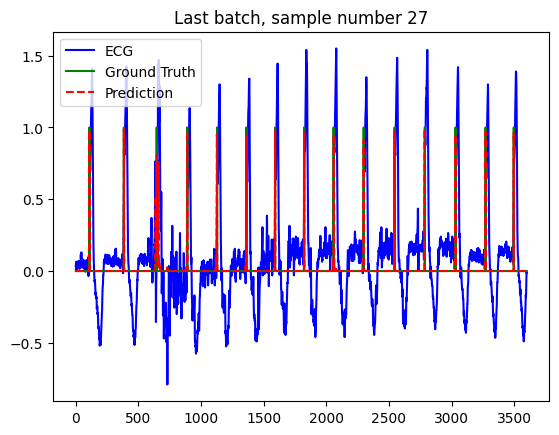

100%|██████████| 238/238 [01:26<00:00,  2.77it/s]



Train Loss: 0.0207
train Weighted Accuracy: 0.99462
train F1 Score: 0.96909
train TPR: 0.98943
train FPR: 0.00019
train TNR: 0.99981
train FNR: 0.01057



100%|██████████| 40/40 [00:03<00:00, 11.13it/s]



Validation Loss: 0.0212
validation Weighted Accuracy: 0.99320
validation F1 Score: 0.97287
validation TPR: 0.98654
validation FPR: 0.00015
validation TNR: 0.99985
validation FNR: 0.01346

====Epoch [38/50]====


100%|█████████▉| 237/238 [01:06<00:00,  2.93it/s]

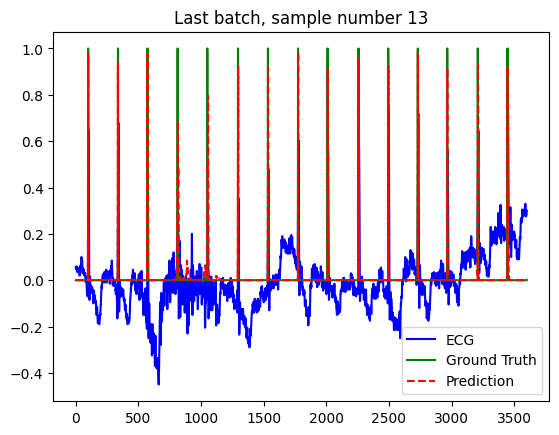

100%|██████████| 238/238 [01:07<00:00,  3.52it/s]



Train Loss: 0.0206
train Weighted Accuracy: 0.99454
train F1 Score: 0.96958
train TPR: 0.98927
train FPR: 0.00018
train TNR: 0.99982
train FNR: 0.01073



100%|██████████| 40/40 [00:04<00:00,  9.66it/s]



Validation Loss: 0.0214
validation Weighted Accuracy: 0.99224
validation F1 Score: 0.97194
validation TPR: 0.98463
validation FPR: 0.00015
validation TNR: 0.99985
validation FNR: 0.01537

====Epoch [39/50]====


100%|█████████▉| 237/238 [01:24<00:00,  2.86it/s]

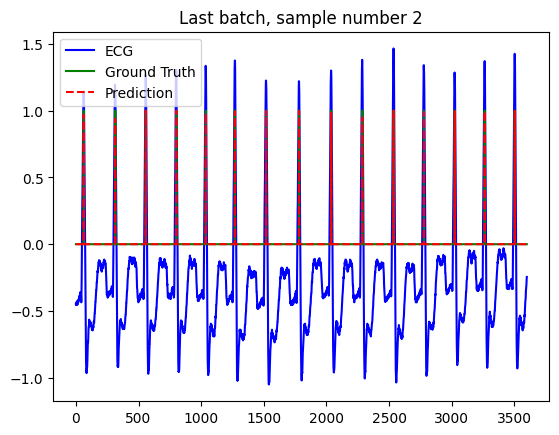

100%|██████████| 238/238 [01:25<00:00,  2.78it/s]



Train Loss: 0.0202
train Weighted Accuracy: 0.99470
train F1 Score: 0.97011
train TPR: 0.98957
train FPR: 0.00018
train TNR: 0.99982
train FNR: 0.01043



100%|██████████| 40/40 [00:05<00:00,  7.33it/s]



Validation Loss: 0.0218
validation Weighted Accuracy: 0.99207
validation F1 Score: 0.97356
validation TPR: 0.98427
validation FPR: 0.00013
validation TNR: 0.99987
validation FNR: 0.01573

====Epoch [40/50]====


100%|█████████▉| 237/238 [01:02<00:00,  4.23it/s]

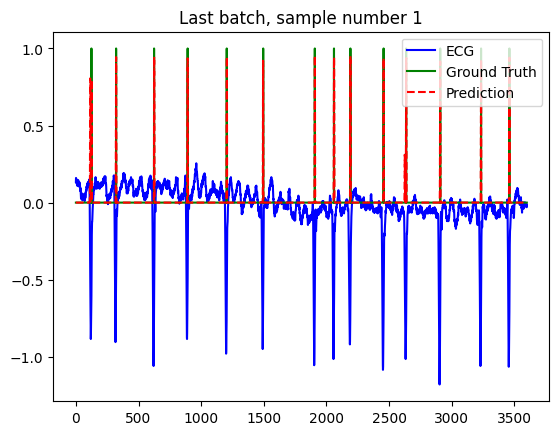

100%|██████████| 238/238 [01:03<00:00,  3.77it/s]



Train Loss: 0.0200
train Weighted Accuracy: 0.99496
train F1 Score: 0.97073
train TPR: 0.99009
train FPR: 0.00018
train TNR: 0.99982
train FNR: 0.00991



100%|██████████| 40/40 [00:05<00:00,  7.91it/s]



Validation Loss: 0.0213
validation Weighted Accuracy: 0.99221
validation F1 Score: 0.97362
validation TPR: 0.98455
validation FPR: 0.00013
validation TNR: 0.99987
validation FNR: 0.01545

====Epoch [41/50]====


100%|█████████▉| 237/238 [01:24<00:00,  2.79it/s]

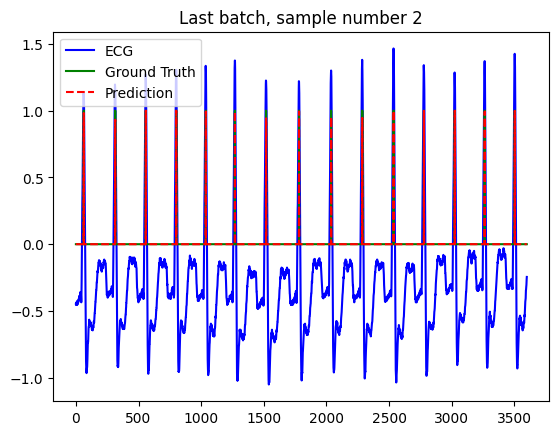

100%|██████████| 238/238 [01:25<00:00,  2.77it/s]



Train Loss: 0.0200
train Weighted Accuracy: 0.99498
train F1 Score: 0.97109
train TPR: 0.99013
train FPR: 0.00017
train TNR: 0.99983
train FNR: 0.00987



100%|██████████| 40/40 [00:05<00:00,  7.38it/s]



Validation Loss: 0.0208
validation Weighted Accuracy: 0.99278
validation F1 Score: 0.97306
validation TPR: 0.98571
validation FPR: 0.00014
validation TNR: 0.99986
validation FNR: 0.01429

====Epoch [42/50]====


100%|█████████▉| 237/238 [01:23<00:00,  2.84it/s]

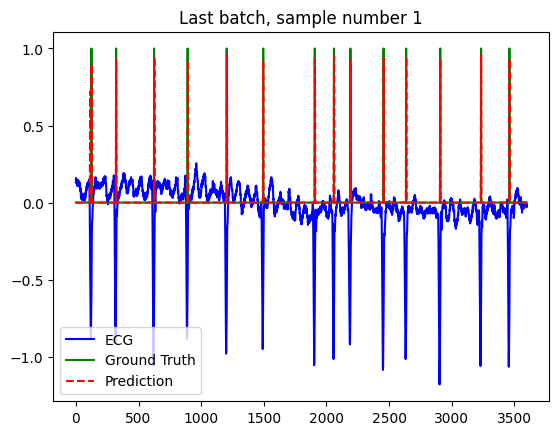

100%|██████████| 238/238 [01:25<00:00,  2.79it/s]



Train Loss: 0.0199
train Weighted Accuracy: 0.99512
train F1 Score: 0.97082
train TPR: 0.99041
train FPR: 0.00018
train TNR: 0.99982
train FNR: 0.00959



100%|██████████| 40/40 [00:05<00:00,  7.81it/s]



Validation Loss: 0.0206
validation Weighted Accuracy: 0.99303
validation F1 Score: 0.97141
validation TPR: 0.98623
validation FPR: 0.00016
validation TNR: 0.99984
validation FNR: 0.01377

====Epoch [43/50]====


100%|█████████▉| 237/238 [01:26<00:00,  2.85it/s]

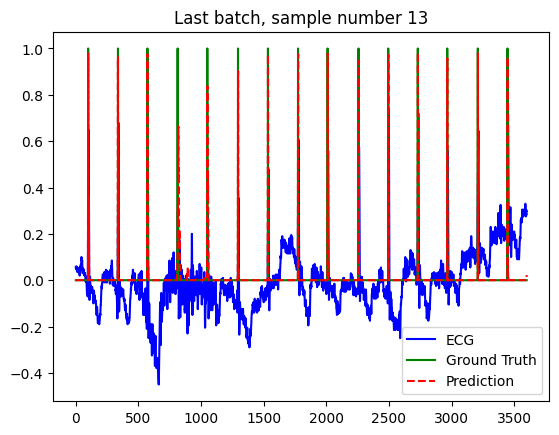

100%|██████████| 238/238 [01:27<00:00,  2.72it/s]



Train Loss: 0.0196
train Weighted Accuracy: 0.99536
train F1 Score: 0.97215
train TPR: 0.99089
train FPR: 0.00017
train TNR: 0.99983
train FNR: 0.00911



100%|██████████| 40/40 [00:05<00:00,  7.29it/s]



Validation Loss: 0.0204
validation Weighted Accuracy: 0.99308
validation F1 Score: 0.97367
validation TPR: 0.98631
validation FPR: 0.00014
validation TNR: 0.99986
validation FNR: 0.01369

====Epoch [44/50]====


100%|█████████▉| 237/238 [01:24<00:00,  2.86it/s]

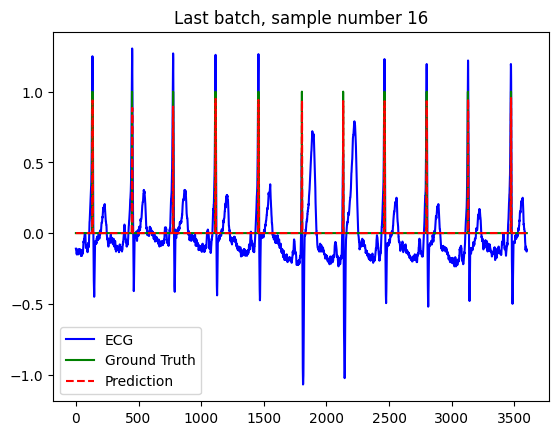

100%|██████████| 238/238 [01:25<00:00,  2.77it/s]



Train Loss: 0.0195
train Weighted Accuracy: 0.99534
train F1 Score: 0.97251
train TPR: 0.99085
train FPR: 0.00017
train TNR: 0.99983
train FNR: 0.00915



100%|██████████| 40/40 [00:03<00:00, 10.95it/s]



Validation Loss: 0.0201
validation Weighted Accuracy: 0.99328
validation F1 Score: 0.97336
validation TPR: 0.98670
validation FPR: 0.00014
validation TNR: 0.99986
validation FNR: 0.01330

====Epoch [45/50]====


100%|█████████▉| 237/238 [01:24<00:00,  2.90it/s]

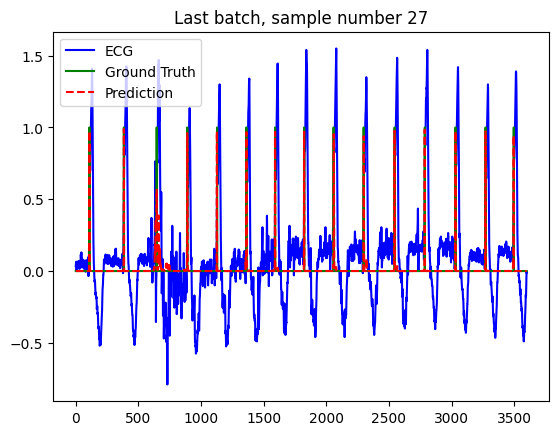

100%|██████████| 238/238 [01:25<00:00,  2.80it/s]



Train Loss: 0.0195
train Weighted Accuracy: 0.99531
train F1 Score: 0.97147
train TPR: 0.99079
train FPR: 0.00017
train TNR: 0.99983
train FNR: 0.00921



100%|██████████| 40/40 [00:05<00:00,  7.64it/s]



Validation Loss: 0.0199
validation Weighted Accuracy: 0.99338
validation F1 Score: 0.97300
validation TPR: 0.98690
validation FPR: 0.00015
validation TNR: 0.99985
validation FNR: 0.01310

====Epoch [46/50]====


100%|█████████▉| 237/238 [01:25<00:00,  2.84it/s]

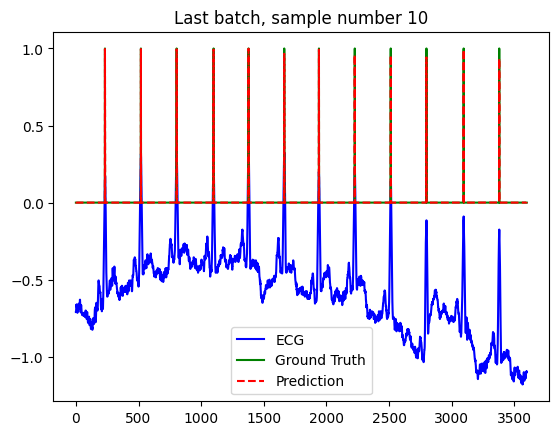

100%|██████████| 238/238 [01:28<00:00,  2.70it/s]



Train Loss: 0.0192
train Weighted Accuracy: 0.99542
train F1 Score: 0.97261
train TPR: 0.99101
train FPR: 0.00017
train TNR: 0.99983
train FNR: 0.00899



100%|██████████| 40/40 [00:05<00:00,  7.68it/s]



Validation Loss: 0.0199
validation Weighted Accuracy: 0.99397
validation F1 Score: 0.97278
validation TPR: 0.98810
validation FPR: 0.00015
validation TNR: 0.99985
validation FNR: 0.01190

====Epoch [47/50]====


100%|█████████▉| 237/238 [01:22<00:00,  2.91it/s]

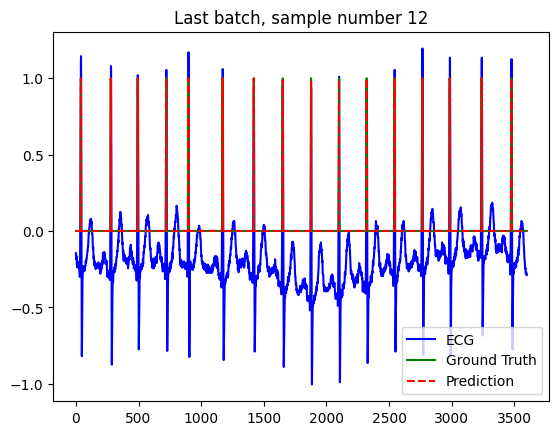

100%|██████████| 238/238 [01:24<00:00,  2.82it/s]



Train Loss: 0.0191
train Weighted Accuracy: 0.99554
train F1 Score: 0.97336
train TPR: 0.99124
train FPR: 0.00016
train TNR: 0.99984
train FNR: 0.00876



100%|██████████| 40/40 [00:05<00:00,  7.89it/s]



Validation Loss: 0.0201
validation Weighted Accuracy: 0.99344
validation F1 Score: 0.97413
validation TPR: 0.98702
validation FPR: 0.00014
validation TNR: 0.99986
validation FNR: 0.01298

====Epoch [48/50]====


100%|█████████▉| 237/238 [01:22<00:00,  2.85it/s]

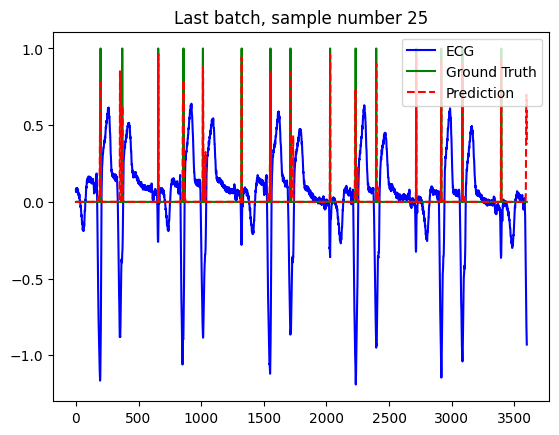

100%|██████████| 238/238 [01:23<00:00,  2.84it/s]



Train Loss: 0.0190
train Weighted Accuracy: 0.99578
train F1 Score: 0.97266
train TPR: 0.99173
train FPR: 0.00017
train TNR: 0.99983
train FNR: 0.00827



100%|██████████| 40/40 [00:03<00:00, 10.51it/s]



Validation Loss: 0.0198
validation Weighted Accuracy: 0.99369
validation F1 Score: 0.97562
validation TPR: 0.98750
validation FPR: 0.00013
validation TNR: 0.99987
validation FNR: 0.01250

====Epoch [49/50]====


100%|█████████▉| 237/238 [00:56<00:00,  4.33it/s]

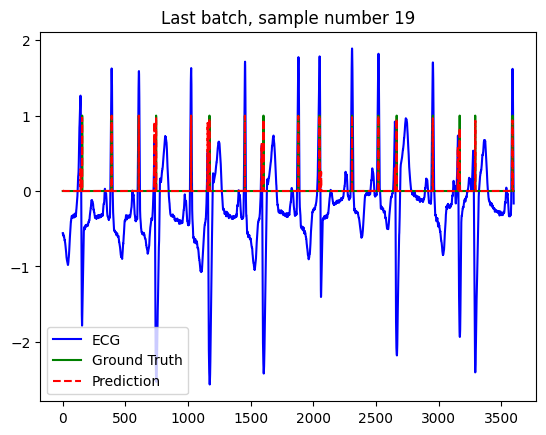

100%|██████████| 238/238 [00:57<00:00,  4.12it/s]



Train Loss: 0.0187
train Weighted Accuracy: 0.99598
train F1 Score: 0.97362
train TPR: 0.99213
train FPR: 0.00016
train TNR: 0.99984
train FNR: 0.00787



100%|██████████| 40/40 [00:03<00:00, 10.34it/s]



Validation Loss: 0.0199
validation Weighted Accuracy: 0.99419
validation F1 Score: 0.97296
validation TPR: 0.98854
validation FPR: 0.00015
validation TNR: 0.99985
validation FNR: 0.01146

====Epoch [50/50]====


100%|█████████▉| 237/238 [00:56<00:00,  4.33it/s]

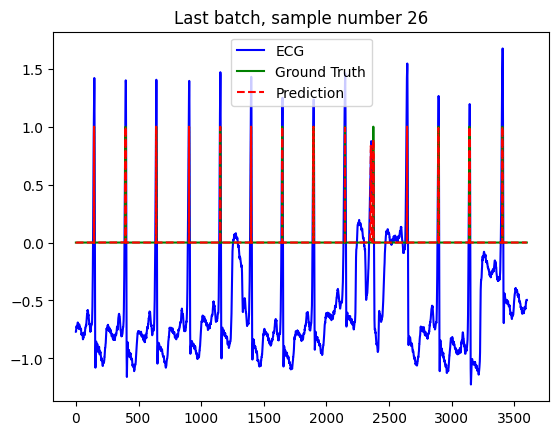

100%|██████████| 238/238 [00:57<00:00,  4.14it/s]



Train Loss: 0.0188
train Weighted Accuracy: 0.99611
train F1 Score: 0.97368
train TPR: 0.99237
train FPR: 0.00016
train TNR: 0.99984
train FNR: 0.00763



100%|██████████| 40/40 [00:05<00:00,  7.98it/s]



Validation Loss: 0.0198
validation Weighted Accuracy: 0.99384
validation F1 Score: 0.97293
validation TPR: 0.98782
validation FPR: 0.00015
validation TNR: 0.99985
validation FNR: 0.01218



In [4]:
model.train_model(x_train=x_train, y_train=y_train, epochs=50, x_val=x_val, y_val=y_val, batch_size=50)

  0%|          | 0/396 [00:00<?, ?it/s]

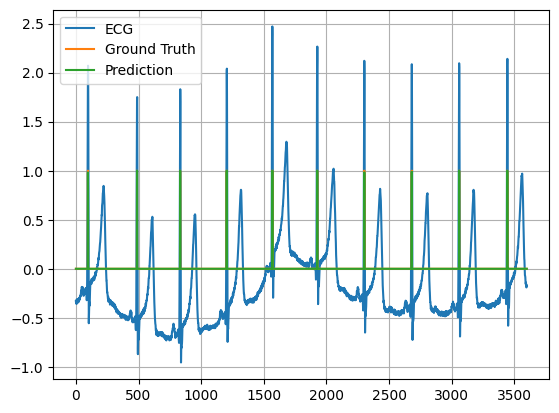

 10%|▉         | 38/396 [00:01<00:11, 31.18it/s]

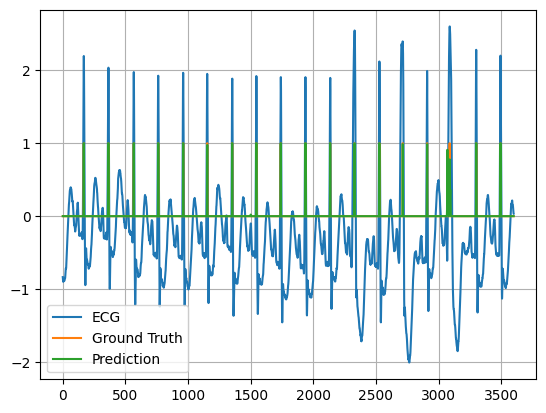

 20%|█▉        | 78/396 [00:02<00:09, 32.62it/s]

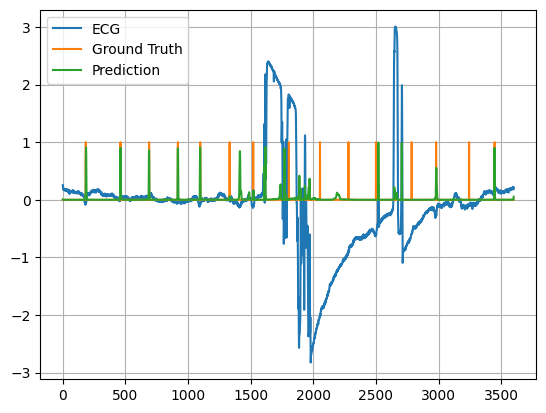

 29%|██▉       | 114/396 [00:04<00:08, 31.86it/s]

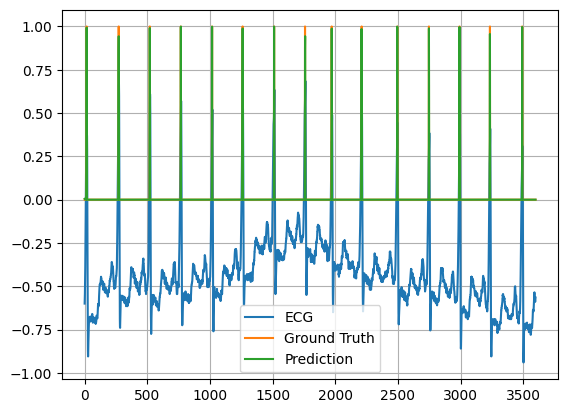

 39%|███▊      | 153/396 [00:05<00:07, 31.73it/s]

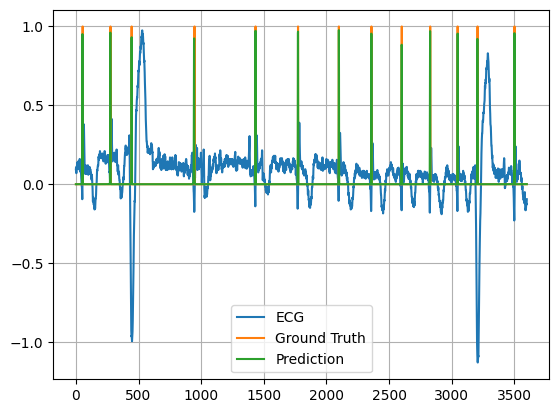

 49%|████▊     | 193/396 [00:07<00:06, 32.22it/s]

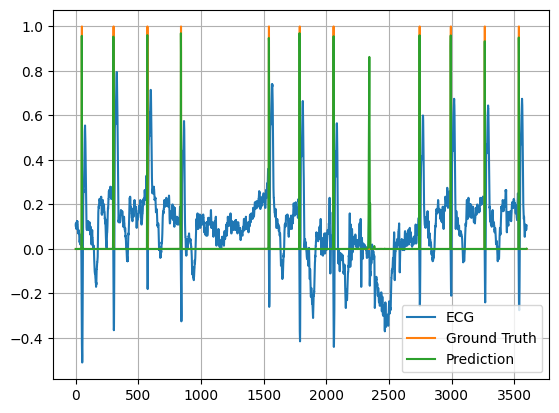

 59%|█████▊    | 232/396 [00:08<00:05, 31.02it/s]

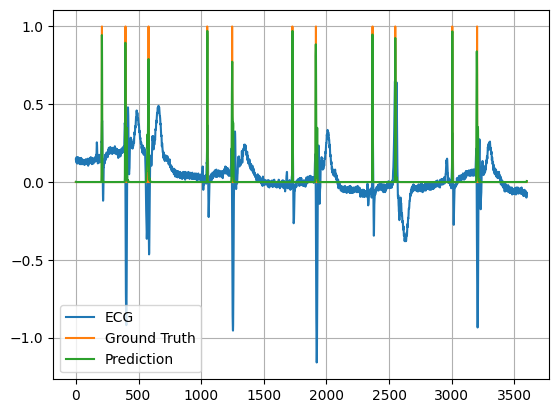

 68%|██████▊   | 270/396 [00:09<00:03, 31.91it/s]

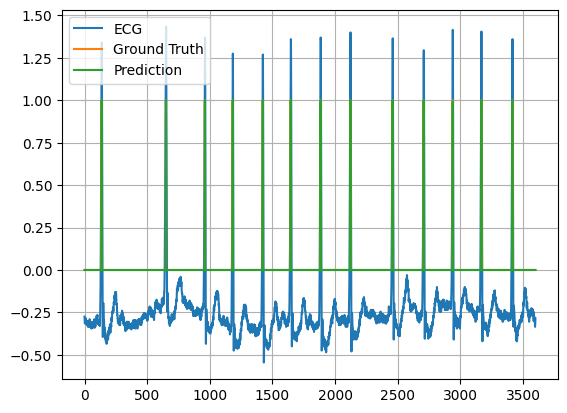

 78%|███████▊  | 309/396 [00:11<00:02, 30.57it/s]

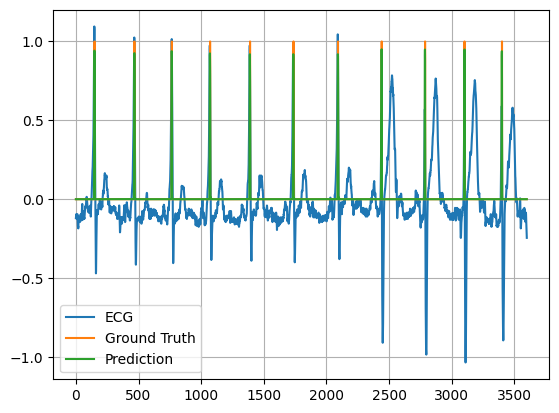

 88%|████████▊ | 349/396 [00:12<00:01, 31.45it/s]

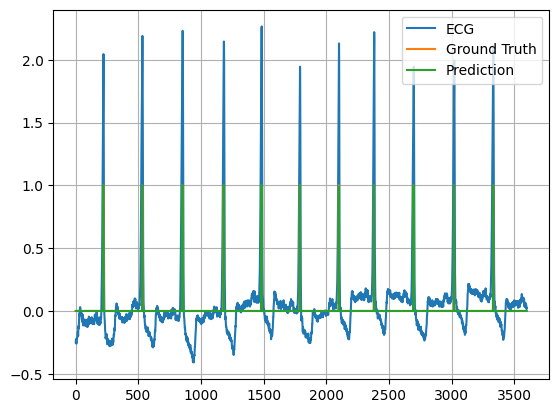

 98%|█████████▊| 389/396 [00:14<00:00, 32.16it/s]

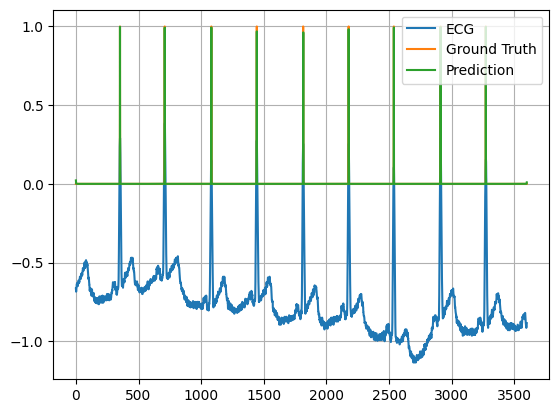

100%|██████████| 396/396 [00:14<00:00, 27.38it/s]



Test Loss: 0.0201
test Weighted Accuracy: 0.99397
test F1 Score: 0.97355
test TPR: 0.98809
test FPR: 0.00015
test TNR: 0.99985
test FNR: 0.01191



In [5]:
model.test_model(x_test, y_test, True)

In [6]:
with open("./metrics/raw/ST_RES_NET.pkl", "wb") as f:
  pickle.dump(model.get_metrics(), f)

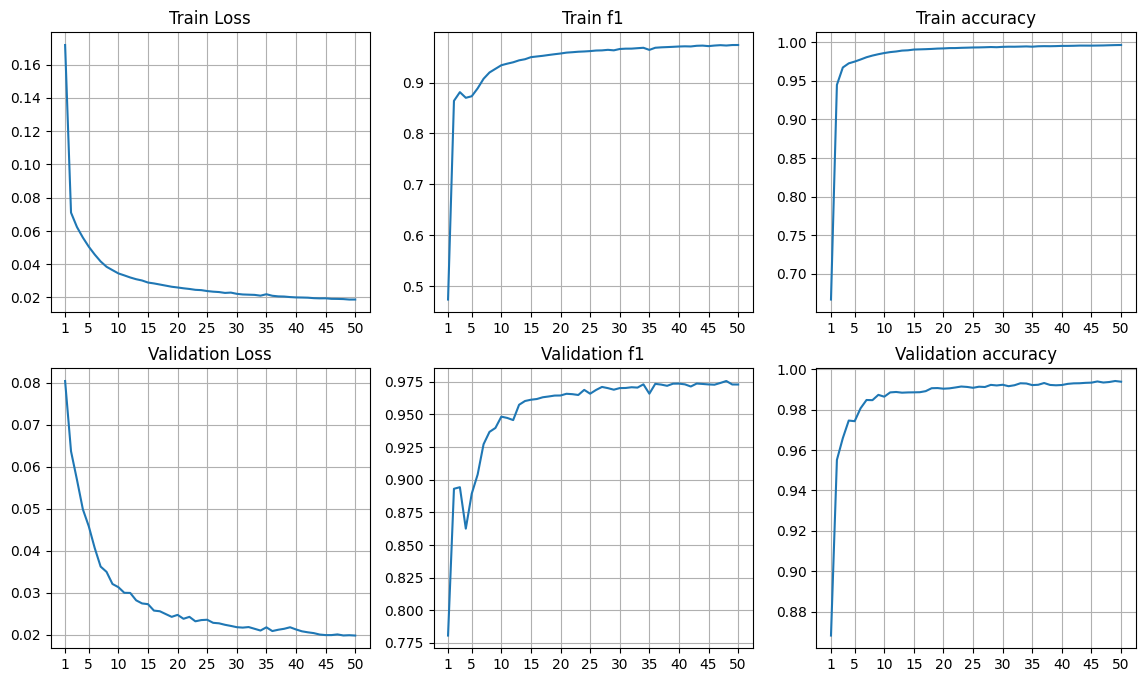

In [15]:
with open("./metrics/raw/ST_RES_NET.pkl", "rb") as f:
  metrics = pickle.load(f)

from customLib.vis import plot_metrics
plot_metrics(metrics)

In [16]:
print_metrics(metrics, "all", 49)


Metrics for phase 'train' at index 49:
Loss: 0.01877
F1: 0.97368
Accuracy: 0.99611
Tpr: 0.99237
Tnr: 0.99984
Fpr: 0.00016
Fnr: 0.00763

Metrics for phase 'validation' at index 49:
Loss: 0.01982
F1: 0.97293
Accuracy: 0.99384
Tpr: 0.98782
Tnr: 0.99985
Fpr: 0.00015
Fnr: 0.01218

Metrics for phase 'test' at index -1:
Loss: 0.02006
F1: 0.97355
Accuracy: 0.99397
Tpr: 0.98809
Tnr: 0.99985
Fpr: 0.00015
Fnr: 0.01191


In [13]:
st_res_net = ST_RES_NET(learning_rate=1e-4, loss_pos_weight=10, loss_neg_weight=1)
st_res_net.load_state_dict(torch.load(".\\checkpoints\\st_res_net\\ST_RES_NET_epoch_49_acc_99.65_f1_0.98.pt", weights_only=True))

raw_st_res_net = ST_RES_NET(learning_rate=1e-4, loss_pos_weight=10, loss_neg_weight=1)
raw_st_res_net.load_state_dict(torch.load(".\\checkpoints\\st_res_net\\raw_ecgs\\ST_RES_NET_epoch_50_acc_99.61_f1_0.97.pt", weights_only=True))


x = np.load(fantasia_path + "\\preprocessed\\downsampled\\x.npy")
y = np.load(fantasia_path + "\\preprocessed\\downsampled\\y.npy")

x_raw = np.load(fantasia_path + "\\preprocessed\\raw\\st_res_net_windows\\x.npy")
y_raw = np.load(fantasia_path + "\\preprocessed\\raw\\st_res_net_windows\\y.npy")


x = np.expand_dims(x, 1)
y = np.expand_dims(y, 1)

x_raw =  np.expand_dims(x_raw, 1)
y_raw = np.expand_dims(y_raw, 1)

Training will be performed with: cuda:0
Training will be performed with: cuda:0


In [15]:
from torch.utils.data import DataLoader
from models.datasets import ECGDataset
from tqdm import tqdm
import matplotlib.pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def test_model(model, x_test, y_test, plot=False):
    test_dataset = ECGDataset(x_test, y_test)
    test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)
    
    running_loss = 0.0
    num_r_peaks = 0.0
    num_correct = 0.0

    all_outputs = []
    all_labels = []
    
    model.eval()
    with torch.no_grad():
        for i, (x_test, y_test) in tqdm(enumerate(test_loader), total=len(test_loader)):
            x, y = x_test.to(device), y_test.to(device)
            outputs = model(x)

            loss = model.criterion(outputs, y)
            running_loss += loss.item()

            outputs = outputs.cpu().detach().numpy()
            y = y.cpu().detach().numpy()

            num_r_peaks += np.where(y == 1)[0].shape[0]
            num_correct += np.where((outputs > 0.5) & (y == 1))[0].shape[0]

            all_outputs.extend(outputs.flatten())
            all_labels.extend(y.flatten())

            if plot and (i % int((len(test_loader) / 10)) == 0):
                ecg = x[0].cpu().detach().numpy().flatten()
                gt = y[0].flatten()
                pred = outputs[0].flatten()

                fig, axs = plt.subplots(nrows=2)
                ax = axs[0]
                ax.plot(ecg)
                ax.grid()
                ax.legend(["ECG"])

                ax = axs[1]
                ax.plot(gt)
                ax.plot(pred)
                ax.grid()
                ax.legend(["Ground Truth", "Prediction"])

                fig.set_size_inches(6,4)
                plt.show()
            
    all_outputs = np.array(all_outputs)
    all_labels = np.array(all_labels)
    y_pred_binary = (all_outputs > 0.5).astype(int)
    test_loss = running_loss / len(test_loader)
    print(f"\nTest Loss: {test_loss:.4f}")
    model.calculate_metrics(test_loss, all_labels, y_pred_binary, "test")
    

  0%|          | 0/2774 [00:00<?, ?it/s]

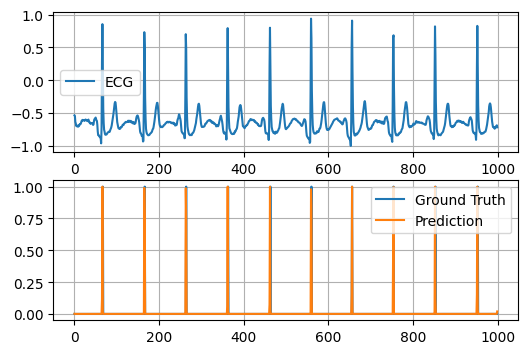

 10%|▉         | 277/2774 [00:06<00:46, 53.75it/s]

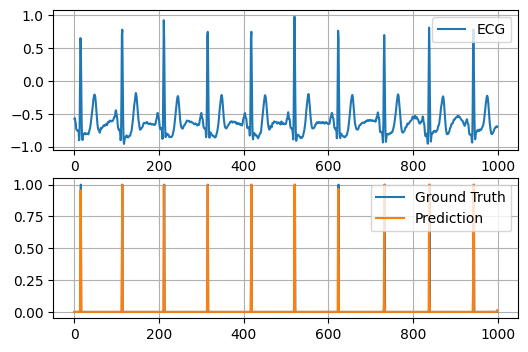

 20%|█▉        | 554/2774 [00:11<00:39, 56.37it/s]

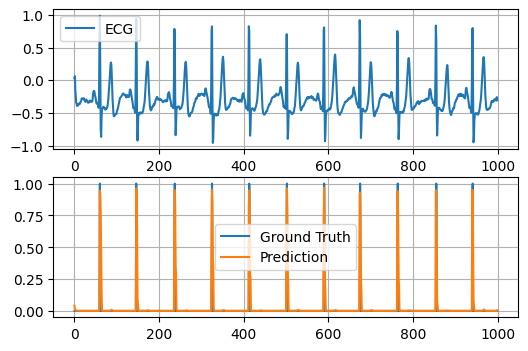

 30%|██▉       | 830/2774 [00:17<00:37, 52.33it/s]

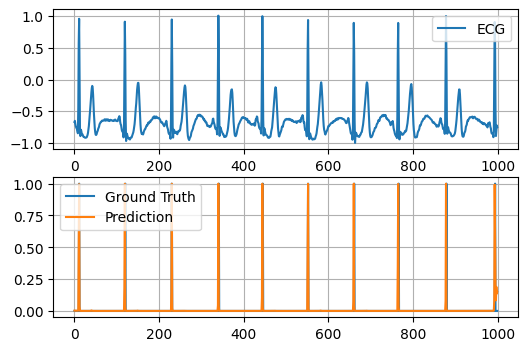

 40%|███▉      | 1103/2774 [00:23<00:30, 54.70it/s]

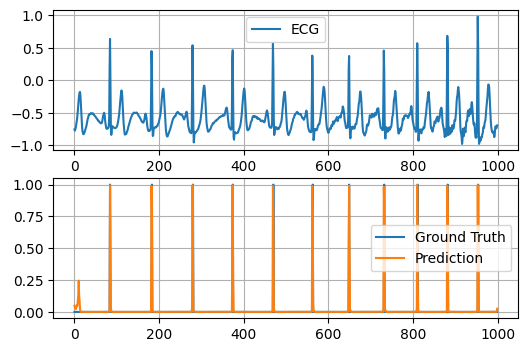

 50%|████▉     | 1385/2774 [00:28<00:24, 56.91it/s]

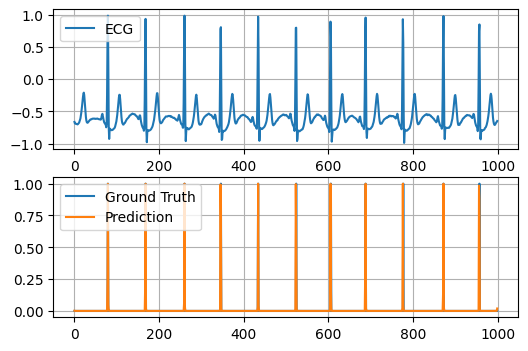

 60%|█████▉    | 1661/2774 [00:33<00:19, 57.31it/s]

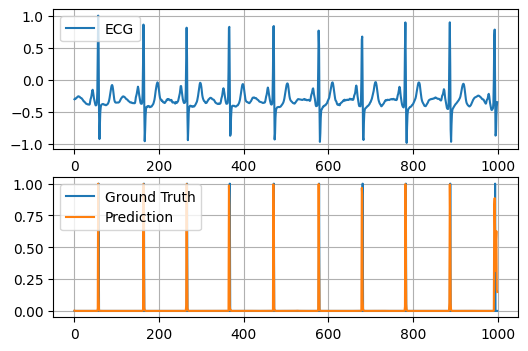

 70%|██████▉   | 1939/2774 [00:38<00:14, 57.90it/s]

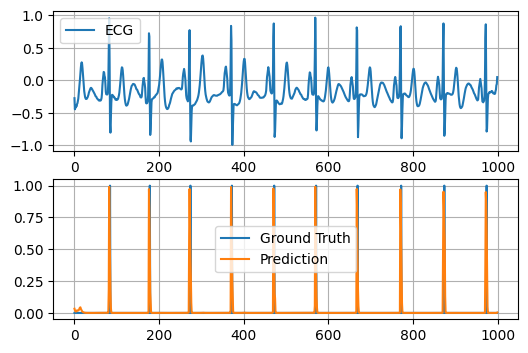

 80%|███████▉  | 2212/2774 [00:44<00:10, 56.06it/s]

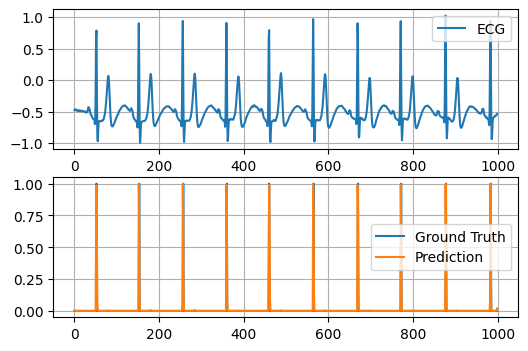

 90%|████████▉ | 2488/2774 [00:49<00:04, 57.57it/s]

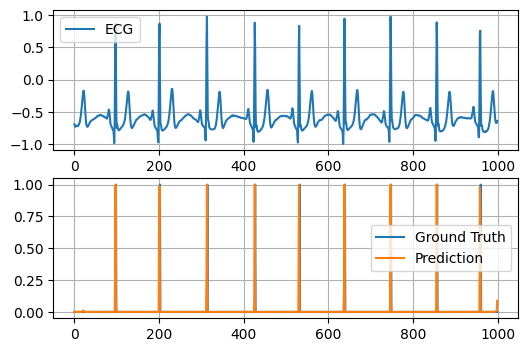

100%|█████████▉| 2766/2774 [00:54<00:00, 58.07it/s]

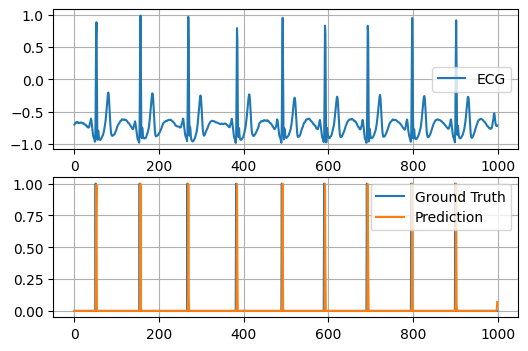

100%|██████████| 2774/2774 [00:54<00:00, 50.49it/s]



Test Loss: 0.2317
test Weighted Accuracy: 0.99968
test F1 Score: 0.99392
test TPR: 0.99948
test FPR: 0.00012
test TNR: 0.99988
test FNR: 0.00052



In [16]:
test_model(st_res_net, x_test=x, y_test=y, plot=True)

  0%|          | 0/1925 [00:00<?, ?it/s]

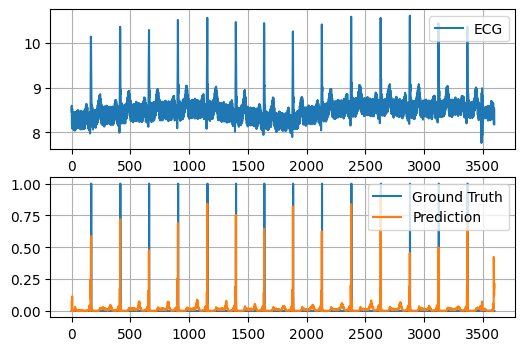

 10%|▉         | 191/1925 [00:10<01:30, 19.23it/s]

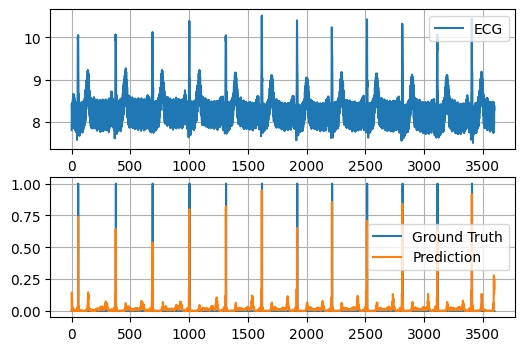

 20%|█▉        | 383/1925 [00:20<01:20, 19.18it/s]

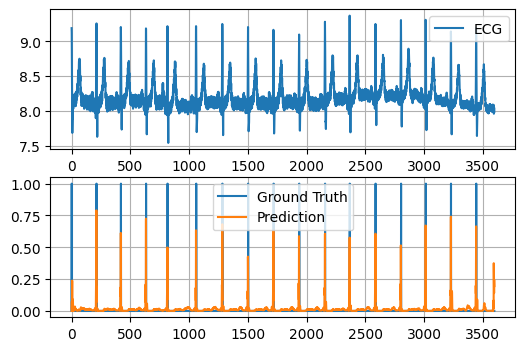

 30%|██▉       | 575/1925 [00:31<01:27, 15.36it/s]

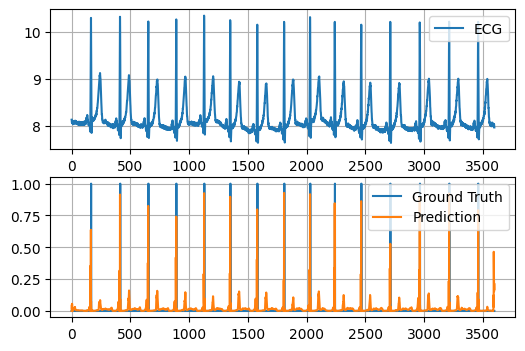

 40%|███▉      | 767/1925 [00:41<01:01, 18.86it/s]

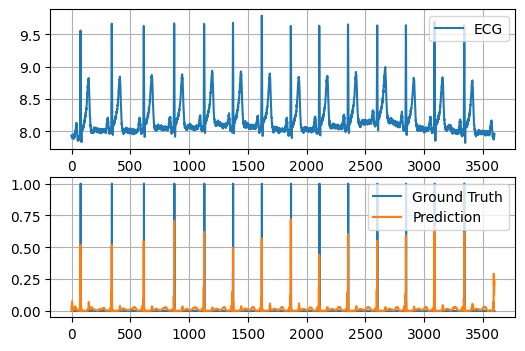

 50%|████▉     | 959/1925 [00:52<00:50, 19.22it/s]

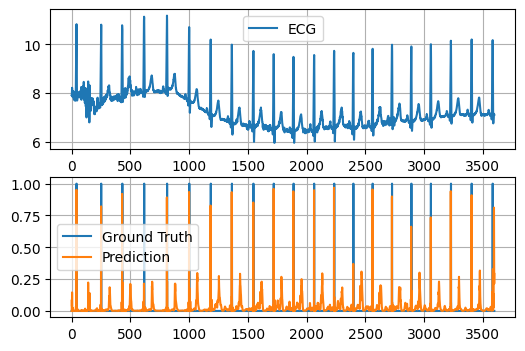

 60%|█████▉    | 1151/1925 [01:02<00:37, 20.40it/s]

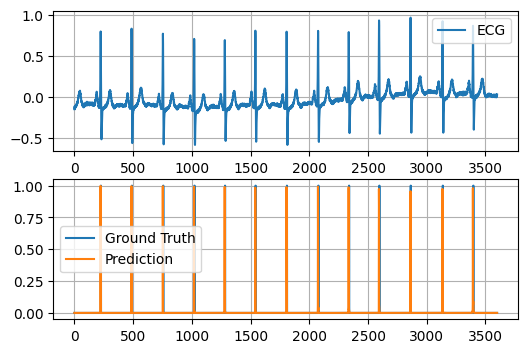

 70%|██████▉   | 1343/1925 [01:13<00:29, 19.89it/s]

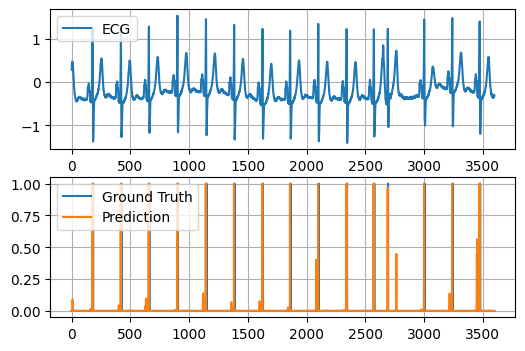

 80%|███████▉  | 1535/1925 [01:23<00:19, 19.53it/s]

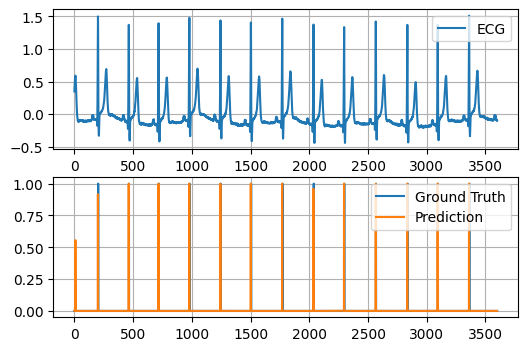

 90%|████████▉ | 1728/1925 [01:33<00:09, 20.02it/s]

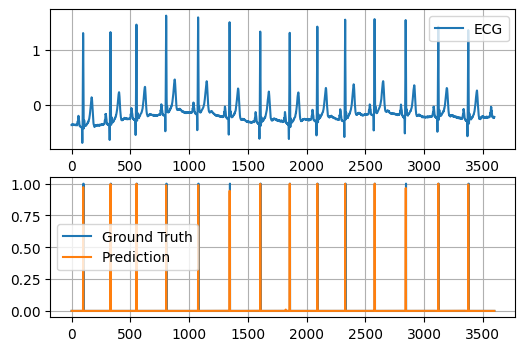

100%|█████████▉| 1918/1925 [01:44<00:00, 20.25it/s]

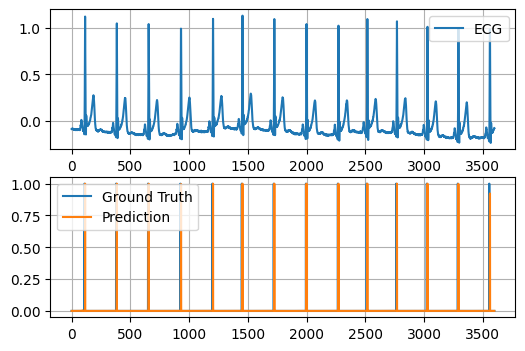

100%|██████████| 1925/1925 [01:45<00:00, 18.27it/s]



Test Loss: 0.2677
test Weighted Accuracy: 0.93079
test F1 Score: 0.86924
test TPR: 0.86206
test FPR: 0.00049
test TNR: 0.99951
test FNR: 0.13794



In [17]:
test_model(raw_st_res_net, x_test=x_raw, y_test=y_raw, plot=True)

### Notes
The ST_RES_NET output layer is Conv1D layer instead of the Dense layer, proposed in the original paper. The number of filters, kernel size, and strides in the Conv1D layer were adjusted to match the number of outpus samples in the original signal.

The Linear / Dense layer resulted in a poor performance during training on both MITBIH and Apnea-ecg datasets. I did not investigate further this issue.

Also the ST_RES_NET model's performance has improved when the loss function has been changed from BCELoss to WeightedBCELoss. The weights are calculated based on the distribution of the labels.